In [1]:
#importing required base packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#importing datasets

#FHFA HPI Master Dataset
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/HPI_master.csv'
hpi = pd.read_csv(url, error_bad_lines=False)

#Case-Schiller HPI
url2 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/CaseSchiller%20HPI'
hpi_cs = pd.read_csv(url2, error_bad_lines=False)

#Fed Fund Rate History
url3 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/FEDFUNDS.csv'
FedRates = pd.read_csv(url3, error_bad_lines=False)

#Zillow - For Sale Inventory
url4 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/For%20Sale%20Inventory%20(SFR)%20Metro%20and%20US.csv'
ForSaleInventory = pd.read_csv(url4, error_bad_lines=False)

#Zillow - Mean Days to Pending Sale
url5 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Mean%20Days%20to%20Pending%20(Metro%20Monthly).csv'
MeanDaysToSale = pd.read_csv(url5, error_bad_lines=False)

#Zillow - Median List Price Single Family Metro
url6 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Median%20List%20Price%20Single%20Family%20Metro.csv'
MedianListPrice = pd.read_csv(url6, error_bad_lines=False)

#Zillow - Median Sale Price Smoothed Seasonally Adjusted
url7 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Median_Sale_Price_Smooth_Seasonally_Adjusted_SingleFamily.csv'
MedianSalePriceSA = pd.read_csv(url7, error_bad_lines=False)

#Zillow - Mean Listing Price Cut Smoothed
url8 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Metro_mean_listings_price_cut_amt_uc_sfr_smoothed_month.csv'
MeanListingPriceCut = pd.read_csv(url8, error_bad_lines=False)

#Zillow - Mean Listing Price Cut Percent
url9 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Metro_mean_listings_price_cut_perc_uc_sfr_smoothed_month.csv'
MeanListingPriceCutPercent = pd.read_csv(url9, error_bad_lines=False)

#Zillow - Median Listing Price Cut
url10 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Metro_med_listings_price_cut_amt_uc_sfr_smoothed_month.csv'
MedianListingPriceCut = pd.read_csv(url10, error_bad_lines=False)

#Zillow - Median Listing Price Cut Percent
url11 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Metro_mean_listings_price_cut_perc_uc_sfr_smoothed_month.csv'
MedianListingPriceCutPercent = pd.read_csv(url11, error_bad_lines=False)

#Zillow - Newly Pending Listings
url12 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Newly%20Pending%20Listings_Metro.csv'
NewPendingListings = pd.read_csv(url12, error_bad_lines=False)

#Zillow - For Sale Inventory
url13 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/RAW%20For%20Sale%20Inventory%20(SFR)%20Metro%20and%20US.csv'
ForSaleInventory = pd.read_csv(url13, error_bad_lines=False)

#Zillow - Sale of Listings with Price Cut
url14 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Share%20of%20Listings%20with%20price%20cut_SingleFamily.csv'
PriceCutShare = pd.read_csv(url14, error_bad_lines=False)

#Zillow - County HPI
url15 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/ZHVI%20Single%20Family%20Home%20Time%20Series%20(COUNTY).csv'
ZillowCountyHPI = pd.read_csv(url15, error_bad_lines=False)

#Zillow - State HPI
url16 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/ZHVI%20Single%20Family%20Home%20Time%20Series%20(STATE).csv'
ZillowStateHPI = pd.read_csv(url16, error_bad_lines=False)

#Zillow - Single Family Home Time Series
url17 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/ZHVI%20Single%20Family%20Home%20Time%20Series.csv'
ZillowSFMTS = pd.read_csv(url17, error_bad_lines=False)

#Country Level Data - AR Model
url18 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/HPI_CountryLevel.csv'
ARTest = pd.read_csv(url18, error_bad_lines=False)

#Country Level Aggregate Metrics - For Correleogram
url19 = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/Country_Agg_Metrics.csv'
Country_Agg = pd.read_csv(url19, error_bad_lines=False)



In [7]:
#importing auto regression model related libraries 
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

In [4]:
#checking AR Test
ARTest.head()

,date,FEDFUNDS,hpi_pct_chng
0,1/1/91,6.91,0.000000
1,2/1/91,6.25,0.450000
2,3/1/91,6.12,0.039821
3,4/1/91,5.91,-0.149269
4,5/1/91,5.78,0.059797


In [5]:
#formatting dataset to index by date
ARTest['date']=pd.to_datetime(ARTest['date'])
ARTest.set_index('date', inplace=True)

In [6]:
ARTest.head()

,FEDFUNDS,hpi_pct_chng
date,,
1991-01-01,6.91,0.000000
1991-02-01,6.25,0.450000
1991-03-01,6.12,0.039821
1991-04-01,5.91,-0.149269
1991-05-01,5.78,0.059797


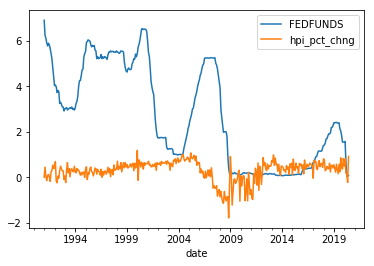

In [7]:
#quick graph of rate of change for HPI against Fed fund rate
ARTest.plot()

In [5]:
#Testing whether or not data is stationary using Dicky-Fuller Test
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
#Source: https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")



In [9]:
#test model
ARmodel = VAR(ARTest)
ARmodel_fit = ARmodel.fit()
pred = ARmodel_fit.forecast(ARmodel_fit.y, steps=10)
print(pred)

print(ARmodel_fit)

[[0.13724879 0.7272001 ]
 [0.1758113  0.59831989]
 [0.20182075 0.51174538]
 [0.21939705 0.4535891 ]
 [0.2313077  0.41452234]
 [0.23941173 0.3882787 ]
 [0.24495791 0.3706488 ]
 [0.2487851  0.35880505]
 [0.25145679 0.35084808]
 [0.25335152 0.345502  ]]


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [10]:
#apply adf test on the series
adf_test(ARTest["FEDFUNDS"])
adf_test(ARTest["hpi_pct_chng"])

Test Statistic           -2.481022
p-value                   0.120160
# Lags                    6.000000
# Observations          347.000000
Critical Value (1%)      -3.449337
Critical Value (5%)      -2.869906
Critical Value (10%)     -2.571227
dtype: float64
 Series is Non-Stationary
Test Statistic           -2.462954
p-value                   0.124750
# Lags                   11.000000
# Observations          342.000000
Critical Value (1%)      -3.449616
Critical Value (5%)      -2.870028
Critical Value (10%)     -2.571292
dtype: float64
 Series is Non-Stationary


In [11]:
#data is non-stationary based on the given threshold

/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


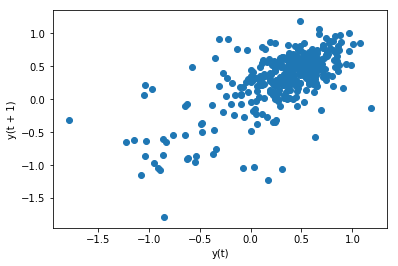

In [12]:
pd.tools.plotting.lag_plot(ARTest['hpi_pct_chng'])

/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


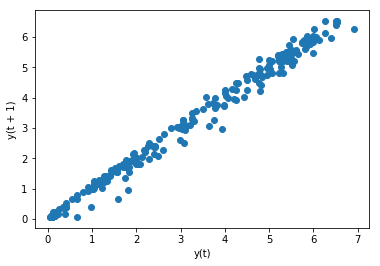

In [13]:
pd.tools.plotting.lag_plot(ARTest['FEDFUNDS'])

/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


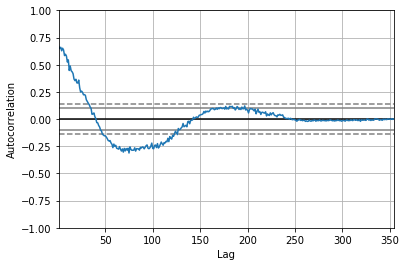

In [14]:
pd.tools.plotting.autocorrelation_plot(ARTest['hpi_pct_chng'])

#Appears to be pretty strong correlation in the first few periods 

/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


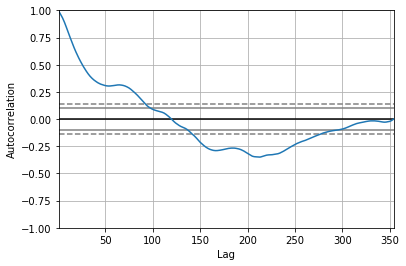

In [15]:
pd.tools.plotting.autocorrelation_plot(ARTest['FEDFUNDS'])

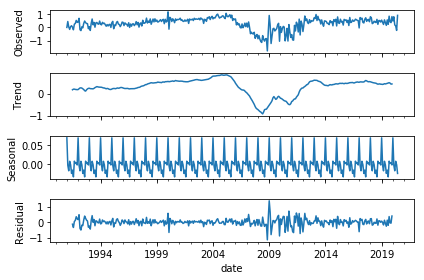

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(ARTest['hpi_pct_chng'], model='additive')
sd_check = sd.plot() 

#High Residuals during housing crisis around 2009
#Clear seasonality 
#Based on trend, this data looks mostly stationary... positive increase until ~2007, then decrease until 2009,... 
#...increase until 2014 then stabilizes  

In [17]:
#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
ARTest['rolling_12M_HPI']=ARTest['hpi_pct_chng'].rolling(window = 12).mean()
ARTest['hpi_pct_chng_adj']=ARTest['hpi_pct_chng'] - ARTest['rolling_12M_HPI']


In [18]:
ARTest

,FEDFUNDS,hpi_pct_chng,rolling_12M_HPI,hpi_pct_chng_adj
date,,,,
1991-01-01,6.91,0.000000,NaN,NaN
1991-02-01,6.25,0.450000,NaN,NaN
1991-03-01,6.12,0.039821,NaN,NaN
1991-04-01,5.91,-0.149269,NaN,NaN
1991-05-01,5.78,0.059797,NaN,NaN
1991-06-01,5.90,0.129482,NaN,NaN
1991-07-01,5.82,0.019895,NaN,NaN
1991-08-01,5.66,-0.179015,NaN,NaN
1991-09-01,5.45,0.249078,NaN,NaN


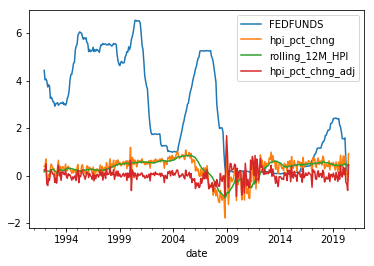

In [19]:
#dropping observations with null values
#ARTest2 = ARTest[ARTest['date'] > '1991-11-01']  
#ARTest2 = ARTest[~(ARTest['rolling_12M_HPI'] is not 'NaN')]

ARTest2 = ARTest.dropna(axis=0, subset =['rolling_12M_HPI'])

ARTest2.plot()


In [20]:
#Testing whether or not data is staionary 
adf_test(ARTest2["hpi_pct_chng_adj"])

#looks better...p value = 0.000105

Test Statistic           -4.649009
p-value                   0.000105
# Lags                   12.000000
# Observations          330.000000
Critical Value (1%)      -3.450322
Critical Value (5%)      -2.870338
Critical Value (10%)     -2.571458
dtype: float64
 Series is Stationary


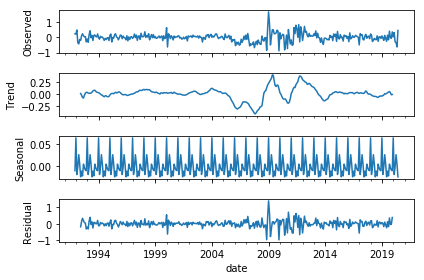

In [21]:
sd = seasonal_decompose(ARTest2['hpi_pct_chng_adj'], model='additive')
sd_check = sd.plot() 

#adjusted home price data looks much better

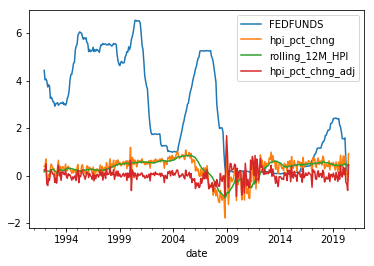

In [22]:
ARTest2.plot()

In [23]:
#Test model
ARmodel2 = VAR(ARTest2)
ARmodel_fit2 = ARmodel2.fit()
ARforecast = ARmodel_fit2.forecast(ARmodel_fit2.y, steps=15)
print(ARforecast)


[[0.11677711 0.59915645 0.48887407 0.11028238]
 [0.14197769 0.54806098 0.5000838  0.04797718]
 [0.16583151 0.54495021 0.50909777 0.03585244]
 [0.19015325 0.55031687 0.51761701 0.03269986]
 [0.21525193 0.55709151 0.52594384 0.03114767]
 [0.24116709 0.56400795 0.53413044 0.02987752]
 [0.2678899  0.57083828 0.54218427 0.02865401]
 [0.29540275 0.57754041 0.5501049  0.02743552]
 [0.32368635 0.58410555 0.55789051 0.02621504]
 [0.35272098 0.59053092 0.56553912 0.0249918 ]
 [0.38248674 0.5968149  0.57304878 0.02376611]
 [0.41296362 0.60295611 0.58041762 0.02253849]
 [0.44413148 0.60895329 0.58764383 0.02130946]
 [0.47597008 0.61480527 0.59472569 0.02007958]
 [0.50845909 0.62051095 0.60166157 0.01884938]]


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [24]:
#ARTest3=ARTest2.drop(ARTest2.columns[[2,3]], axis = 1, inplace = True) 
#ARTest3 = ARTest2.drop('hpi_pct_chng', axis=1)
#ARTest2.head()
ARTest2 = ARTest.dropna(axis=0, subset =['rolling_12M_HPI'])
ARTest3 = ARTest2.drop('hpi_pct_chng', axis=1)
ARTest3 = ARTest3.drop('rolling_12M_HPI', axis=1)
ARTest3.describe()


,FEDFUNDS,hpi_pct_chng_adj
count,343.000000,343.000000
mean,2.590554,0.004027
std,2.156627,0.272628
min,0.050000,-0.882486
25%,0.215000,-0.133794
50%,2.090000,0.014384
75%,4.885000,0.130890
max,6.540000,1.678053


In [25]:
#splitting data for training vs testing
#create train/test datasets - 10 years of training data

AR_train1 = ARTest3[1:120]
AR_test1 = ARTest3[120:]

In [26]:
#Training the model on 10 years of testing
AR_train1.head()

,FEDFUNDS,hpi_pct_chng_adj
date,,
1992-01-01,4.03,0.224890
1992-02-01,4.06,0.486406
1992-03-01,3.98,-0.355840
1992-04-01,3.73,-0.426102
1992-05-01,3.82,-0.133262


In [27]:
#Testing on present 
AR_test1.head()

,FEDFUNDS,hpi_pct_chng_adj
date,,
2001-12-01,1.82,0.100351
2002-01-01,1.73,0.042079
2002-02-01,1.74,0.055202
2002-03-01,1.73,0.100729
2002-04-01,1.75,-0.006857


In [28]:
#10 Year Training Model 
AR10yr = VAR(AR_train1)
AR10yr_fit = AR10yr.fit()



/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [29]:
#Looking at model coefficients
AR10yr_fit.params

,FEDFUNDS,hpi_pct_chng_adj
const,-0.057435,-0.048191
L1.FEDFUNDS,1.008450,0.012828
L1.hpi_pct_chng_adj,0.013709,-0.144353


In [30]:
ARforecast10yr = AR10yr_fit.forecast(AR10yr_fit.y, steps=15)
print(ARforecast10yr)



[[ 2.0470452   0.01210403]
 [ 2.00707334 -0.02367858]
 [ 1.96627319 -0.01902603]
 [ 1.92519207 -0.02022103]
 [ 1.88374745 -0.02057553]
 [ 1.84194778 -0.02105601]
 [ 1.79978833 -0.02152287]
 [ 1.75726625 -0.02199631]
 [ 1.71437838 -0.02247345]
 [ 1.67112158 -0.02295475]
 [ 1.62749268 -0.02344018]
 [ 1.58348848 -0.02392979]
 [ 1.53910574 -0.02442361]
 [ 1.49434122 -0.02492167]
 [ 1.44919163 -0.02542403]]


In [31]:
#TestCode
AR10yr_fit_test2 = AR10yr.fit(2)
AR10yr_fit_test12 = AR10yr.fit(12)
AR10yr_fit_test100 = AR10yr.fit(100)

/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


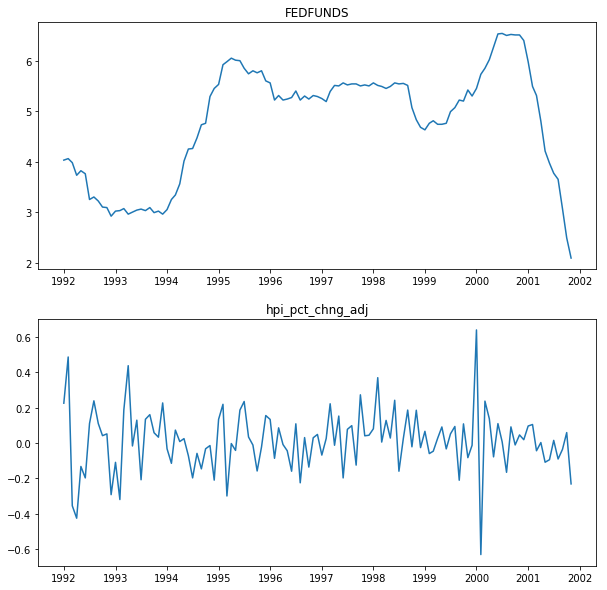

In [32]:
AR10yr_fit_test2.plot()

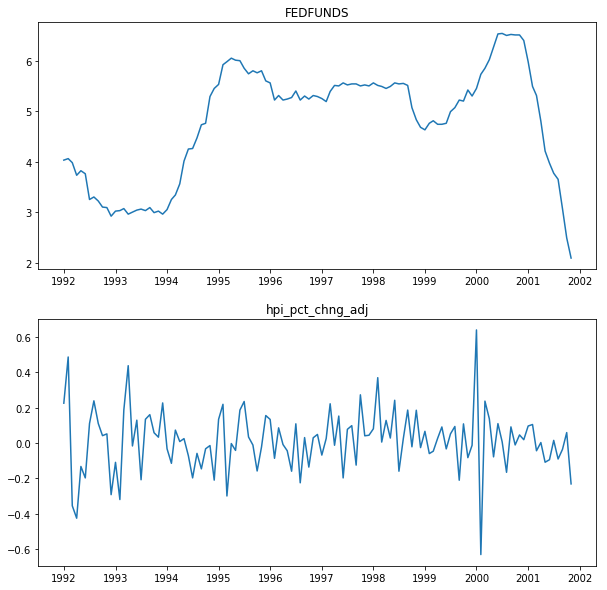

In [33]:
AR10yr_fit_test12.plot()

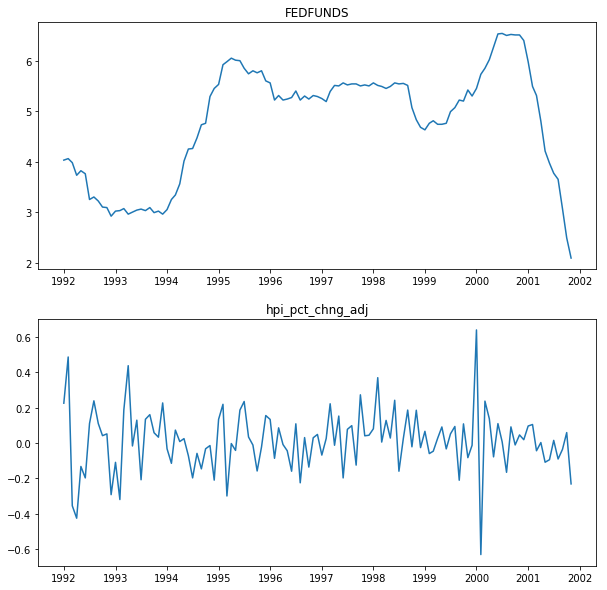

In [34]:
AR10yr_fit_test100.plot()

In [35]:
AR10yr_fit_test12.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     19:36:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.81527
Nobs:                     107.000    HQIC:                  -6.55793
Log likelihood:           124.285    FPE:                0.000870307
AIC:                     -7.06425    Det(Omega_mle):     0.000571863
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.167516         0.091101            1.839           0.070
L1.FEDFUNDS                  1.278189         0.106694           11.980           0.000
L1.hpi_pct_chng_adj          

In [36]:
ARforecast10yr = AR10yr_fit.forecast(AR10yr_fit.y, steps=48)
print(ARforecast10yr)



[[ 2.0470452   0.01210403]
 [ 2.00707334 -0.02367858]
 [ 1.96627319 -0.01902603]
 [ 1.92519207 -0.02022103]
 [ 1.88374745 -0.02057553]
 [ 1.84194778 -0.02105601]
 [ 1.79978833 -0.02152287]
 [ 1.75726625 -0.02199631]
 [ 1.71437838 -0.02247345]
 [ 1.67112158 -0.02295475]
 [ 1.62749268 -0.02344018]
 [ 1.58348848 -0.02392979]
 [ 1.53910574 -0.02442361]
 [ 1.49434122 -0.02492167]
 [ 1.44919163 -0.02542403]
 [ 1.40365365 -0.0259307 ]
 [ 1.35772395 -0.02644173]
 [ 1.31139915 -0.02695716]
 [ 1.26467586 -0.02747702]
 [ 1.21755064 -0.02800135]
 [ 1.17002005 -0.0285302 ]
 [ 1.12208059 -0.02906359]
 [ 1.07372875 -0.02960157]
 [ 1.02496098 -0.03014418]
 [ 0.9757737  -0.03069146]
 [ 0.9261633  -0.03124344]
 [ 0.87612615 -0.03180017]
 [ 0.82565856 -0.0323617 ]
 [ 0.77475685 -0.03292805]
 [ 0.72341727 -0.03349927]
 [ 0.67163606 -0.03407541]
 [ 0.61940942 -0.0346565 ]
 [ 0.56673352 -0.0352426 ]
 [ 0.51360449 -0.03583373]
 [ 0.46001844 -0.03642995]
 [ 0.40597142 -0.0370313 ]
 [ 0.35145949 -0.03763782]
 

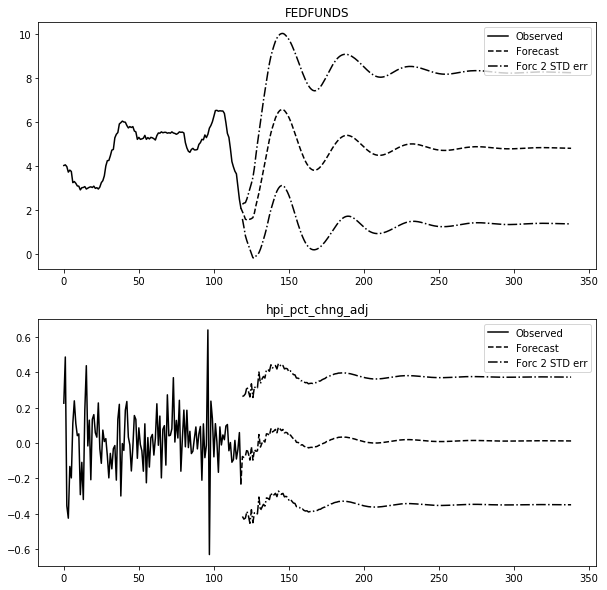

In [37]:
#Running Test Model for remaining periods in forecast.... come back to this to plot against actuals
AR10yr_fit_test12.plot_forecast(220)

In [38]:
ARforecast10yr = AR10yr_fit.forecast(AR10yr_fit.y, steps=24)
print(ARforecast10yr)

[[ 2.0470452   0.01210403]
 [ 2.00707334 -0.02367858]
 [ 1.96627319 -0.01902603]
 [ 1.92519207 -0.02022103]
 [ 1.88374745 -0.02057553]
 [ 1.84194778 -0.02105601]
 [ 1.79978833 -0.02152287]
 [ 1.75726625 -0.02199631]
 [ 1.71437838 -0.02247345]
 [ 1.67112158 -0.02295475]
 [ 1.62749268 -0.02344018]
 [ 1.58348848 -0.02392979]
 [ 1.53910574 -0.02442361]
 [ 1.49434122 -0.02492167]
 [ 1.44919163 -0.02542403]
 [ 1.40365365 -0.0259307 ]
 [ 1.35772395 -0.02644173]
 [ 1.31139915 -0.02695716]
 [ 1.26467586 -0.02747702]
 [ 1.21755064 -0.02800135]
 [ 1.17002005 -0.0285302 ]
 [ 1.12208059 -0.02906359]
 [ 1.07372875 -0.02960157]
 [ 1.02496098 -0.03014418]]


In [39]:
#housing_df = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['target'])
#forecast_dt = pd.DataFrame(data= ARforecast10yr.[data['data'], data['target']],columns= data['fedrate'] + ['hpi'])

In [40]:
Country_Agg.head()

,date,FEDFUNDS,hpi_pct_chng,for_sale_inventory,mean_days_to_pending,median_list_price,median_sale_price,med_listing_price_cut_pct,share_of_listing_w_pricecut
0,1/1/91,6.91,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/91,6.25,0.450000,NaN,NaN,NaN,NaN,NaN,NaN
2,3/1/91,6.12,0.039821,NaN,NaN,NaN,NaN,NaN,NaN
3,4/1/91,5.91,-0.149269,NaN,NaN,NaN,NaN,NaN,NaN
4,5/1/91,5.78,0.059797,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Indexing by date
Country_Agg['date']=pd.to_datetime(Country_Agg['date'])
Country_Agg.set_index('date', inplace=True)

In [45]:
Country_Agg.head()

,FEDFUNDS,hpi_pct_chng,for_sale_inventory,mean_days_to_pending,median_list_price,median_sale_price,med_listing_price_cut_pct,share_of_listing_w_pricecut
date,,,,,,,,
1991-01-01,6.91,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,6.25,0.450000,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,6.12,0.039821,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,5.91,-0.149269,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,5.78,0.059797,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#creating a diagonal correleogram
corr = Country_Agg.corr()



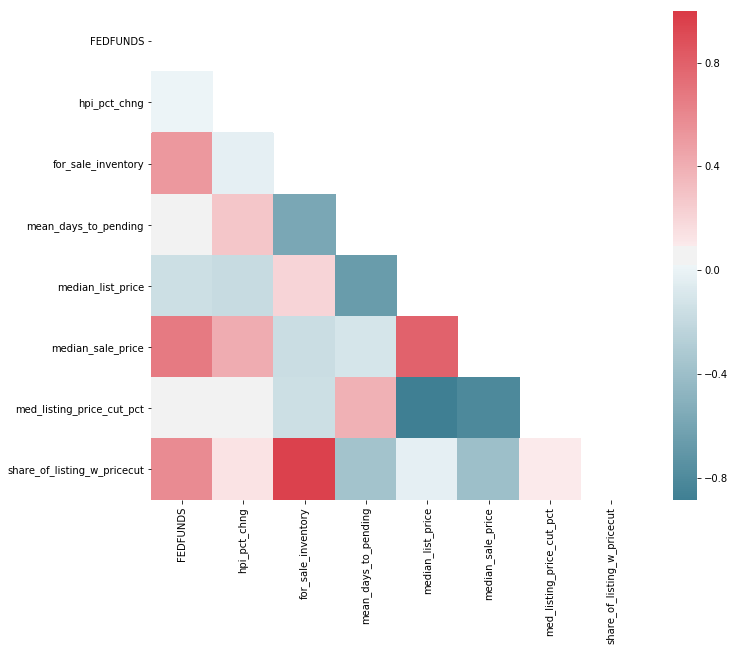

In [47]:
# Generate a mask for the upper half of correleogram
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Creating heatmap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

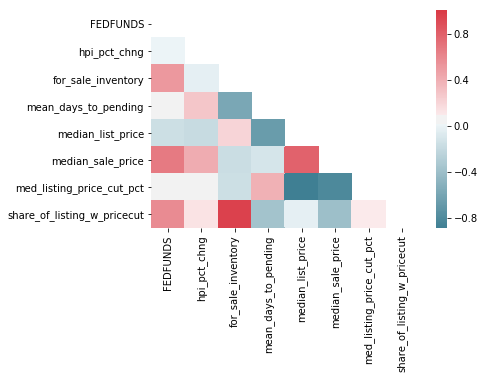

In [48]:
chart1 = sns.heatmap(corr, mask=mask, cmap=cmap)

# State Level Models

In [61]:
# Importing state level datasets - AK

#AK
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_AK.csv'
AK_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
AK_HPI['date']=pd.to_datetime(AK_HPI['date'])
AK_HPI.set_index('date', inplace=True)
AK_HPI = AK_HPI.drop('hpi', axis=1)
AK_HPI2= AK_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
AK_HPI2['rolling_12M_HPI']=AK_HPI['hpi_pct_chng'].rolling(window = 4).mean()
AK_HPI2['hpi_pct_chng_adj']=AK_HPI2['hpi_pct_chng'] - AK_HPI['rolling_12M_HPI']

AK_HPI2 = AK_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
AK_HPI2 = AK_HPI2.drop('hpi_pct_chng', axis=1)
AK_HPI2 = AK_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(AK_HPI2["hpi_pct_chng_adj"])

AK_train = AK_HPI2[1:30]
AK_test = AK_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

AK10yr = VAR(AK_train)
AK10yr_fit = AK10yr.fit()

AK10yr_fit_test12 = AK10yr.fit(12)

AK10yr_fit_test12.summary()










Test Statistic         -1.005635e+01
p-value                 1.369790e-17
# Lags                  3.000000e+00
# Observations          1.110000e+02
Critical Value (1%)    -3.490683e+00
Critical Value (5%)    -2.887952e+00
Critical Value (10%)   -2.580857e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:16:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.504
Nobs:                     17.0000    HQIC:                  -126.712
Log likelihood:           1080.87    FPE:                5.62008e-57
AIC:                     -126.955    Det(Omega_mle):     9.20750e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.063759              NAN              NAN             NAN
L1.FEDFUNDS                  0.333243              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [65]:
# Importing state level datasets - AL

#AL
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_AL.csv'
AL_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
AL_HPI['date']=pd.to_datetime(AL_HPI['date'])
AL_HPI.set_index('date', inplace=True)
AL_HPI = AL_HPI.drop('hpi', axis=1)
AL_HPI2= AL_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
AL_HPI2['rolling_12M_HPI']=AL_HPI['hpi_pct_chng'].rolling(window = 4).mean()
AL_HPI2['hpi_pct_chng_adj']=AL_HPI2['hpi_pct_chng'] - AL_HPI['rolling_12M_HPI']

AL_HPI2 = AL_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
AL_HPI2 = AL_HPI2.drop('hpi_pct_chng', axis=1)
AL_HPI2 = AL_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(AL_HPI2["hpi_pct_chng_adj"])

AL_train = AL_HPI2[1:30]
AL_test = AL_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

AL10yr = VAR(AL_train)
AL10yr_fit = AL10yr.fit()

AL10yr_fit_test12 = AL10yr.fit(12)

AL10yr_fit_test12.summary()


Test Statistic           -3.122765
p-value                   0.024914
# Lags                   10.000000
# Observations          104.000000
Critical Value (1%)      -3.494850
Critical Value (5%)      -2.889758
Critical Value (10%)     -2.581822
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:21:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.133
Nobs:                     17.0000    HQIC:                  -127.340
Log likelihood:           1086.22    FPE:                2.99693e-57
AIC:                     -127.584    Det(Omega_mle):     4.90994e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.176860         0.000002       113201.381             NAN
L1.FEDFUNDS                  0.625619         0.000000      4633384.895             NAN
L1.hpi_pct_chng_adj          

In [68]:
# Importing state level datasets - AR

#AR2
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_AR.csv'
AR2_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
AR2_HPI['date']=pd.to_datetime(AR2_HPI['date'])
AR2_HPI.set_index('date', inplace=True)
AR2_HPI = AR2_HPI.drop('hpi', axis=1)
AR2_HPI2= AR2_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
AR2_HPI2['rolling_12M_HPI']=AR2_HPI['hpi_pct_chng'].rolling(window = 4).mean()
AR2_HPI2['hpi_pct_chng_adj']=AR2_HPI2['hpi_pct_chng'] - AR2_HPI['rolling_12M_HPI']

AR2_HPI2 = AR2_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
AR2_HPI2 = AR2_HPI2.drop('hpi_pct_chng', axis=1)
AR2_HPI2 = AR2_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(AR2_HPI2["hpi_pct_chng_adj"])

AR2_train = AR2_HPI2[1:30]
AR2_test = AR2_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

AR210yr = VAR(AR2_train)
AR210yr_fit = AR210yr.fit()

AR210yr_fit_test12 = AR210yr.fit(12)

AR210yr_fit_test12.summary()




Test Statistic           -4.793487
p-value                   0.000056
# Lags                    6.000000
# Observations          108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:22:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -120.317
Nobs:                     17.0000    HQIC:                  -122.524
Log likelihood:           1045.28    FPE:                3.70004e-55
AIC:                     -122.768    Det(Omega_mle):     6.06185e-56
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.792394         0.000000      3839902.614             NAN
L1.FEDFUNDS                  1.086620         0.000000     98953416.432             NAN
L1.hpi_pct_chng_adj         -

In [70]:
# Importing state level datasets - AZ

#AZ
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_AZ.csv'
AZ_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
AZ_HPI['date']=pd.to_datetime(AZ_HPI['date'])
AZ_HPI.set_index('date', inplace=True)
AZ_HPI = AZ_HPI.drop('hpi', axis=1)
AZ_HPI2= AZ_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
AZ_HPI2['rolling_12M_HPI']=AZ_HPI['hpi_pct_chng'].rolling(window = 4).mean()
AZ_HPI2['hpi_pct_chng_adj']=AZ_HPI2['hpi_pct_chng'] - AZ_HPI['rolling_12M_HPI']

AZ_HPI2 = AZ_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
AZ_HPI2 = AZ_HPI2.drop('hpi_pct_chng', axis=1)
AZ_HPI2 = AZ_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(AZ_HPI2["hpi_pct_chng_adj"])

AZ_train = AZ_HPI2[1:30]
AZ_test = AZ_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

AZ10yr = VAR(AZ_train)
AZ10yr_fit = AZ10yr.fit()

AZ10yr_fit_test12 = AZ10yr.fit(12)

AZ10yr_fit_test12.summary()



Test Statistic           -4.038896
p-value                   0.001220
# Lags                    4.000000
# Observations          110.000000
Critical Value (1%)      -3.491245
Critical Value (5%)      -2.888195
Critical Value (10%)     -2.580988
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:23:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.113
Nobs:                     17.0000    HQIC:                  -126.321
Log likelihood:           1077.55    FPE:                8.30906e-57
AIC:                     -126.564    Det(Omega_mle):     1.36129e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.209144         0.000000       507622.829             NAN
L1.FEDFUNDS                  0.762606         0.000000     49643408.342             NAN
L1.hpi_pct_chng_adj         -

In [71]:
# Importing state level datasets - CA

#CA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_CA.csv'
CA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
CA_HPI['date']=pd.to_datetime(CA_HPI['date'])
CA_HPI.set_index('date', inplace=True)
CA_HPI = CA_HPI.drop('hpi', axis=1)
CA_HPI2= CA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
CA_HPI2['rolling_12M_HPI']=CA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
CA_HPI2['hpi_pct_chng_adj']=CA_HPI2['hpi_pct_chng'] - CA_HPI['rolling_12M_HPI']

CA_HPI2 = CA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
CA_HPI2 = CA_HPI2.drop('hpi_pct_chng', axis=1)
CA_HPI2 = CA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(CA_HPI2["hpi_pct_chng_adj"])

CA_train = CA_HPI2[1:30]
CA_test = CA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

CA10yr = VAR(CA_train)
CA10yr_fit = CA10yr.fit()

CA10yr_fit_test12 = CA10yr.fit(12)

CA10yr_fit_test12.summary()


Test Statistic           -5.485659
p-value                   0.000002
# Lags                    1.000000
# Observations          113.000000
Critical Value (1%)      -3.489590
Critical Value (5%)      -2.887477
Critical Value (10%)     -2.580604
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:24:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.366
Nobs:                     17.0000    HQIC:                  -124.573
Log likelihood:           1062.70    FPE:                4.76994e-56
AIC:                     -124.817    Det(Omega_mle):     7.81469e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.174918         0.000000       698021.774             NAN
L1.FEDFUNDS                  0.679944         0.000000     25324960.626             NAN
L1.hpi_pct_chng_adj         -

In [72]:
# Importing state level datasets - CO

#CO
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_CO.csv'
CO_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
CO_HPI['date']=pd.to_datetime(CO_HPI['date'])
CO_HPI.set_index('date', inplace=True)
CO_HPI = CO_HPI.drop('hpi', axis=1)
CO_HPI2= CO_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
CO_HPI2['rolling_12M_HPI']=CO_HPI['hpi_pct_chng'].rolling(window = 4).mean()
CO_HPI2['hpi_pct_chng_adj']=CO_HPI2['hpi_pct_chng'] - CO_HPI['rolling_12M_HPI']

CO_HPI2 = CO_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
CO_HPI2 = CO_HPI2.drop('hpi_pct_chng', axis=1)
CO_HPI2 = CO_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(CO_HPI2["hpi_pct_chng_adj"])

CO_train = CO_HPI2[1:30]
CO_test = CO_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

CO10yr = VAR(CO_train)
CO10yr_fit = CO10yr.fit()

CO10yr_fit_test12 = CO10yr.fit(12)

CO10yr_fit_test12.summary()


Test Statistic           -1.877412
p-value                   0.342761
# Lags                   12.000000
# Observations          102.000000
Critical Value (1%)      -3.496149
Critical Value (5%)      -2.890321
Critical Value (10%)     -2.582122
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     22:26:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.973
Nobs:                     17.0000    HQIC:                  -129.180
Log likelihood:           1101.85    FPE:                4.76237e-58
AIC:                     -129.423    Det(Omega_mle):     7.80230e-59
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.127086         0.000000       663822.035             NAN
L1.FEDFUNDS                  0.218473              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [74]:
# Importing state level datasets - CT

#CT
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_CT.csv'
CT_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
CT_HPI['date']=pd.to_datetime(CT_HPI['date'])
CT_HPI.set_index('date', inplace=True)
CT_HPI = CT_HPI.drop('hpi', axis=1)
CT_HPI2= CT_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
CT_HPI2['rolling_12M_HPI']=CT_HPI['hpi_pct_chng'].rolling(window = 4).mean()
CT_HPI2['hpi_pct_chng_adj']=CT_HPI2['hpi_pct_chng'] - CT_HPI['rolling_12M_HPI']

CT_HPI2 = CT_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
CT_HPI2 = CT_HPI2.drop('hpi_pct_chng', axis=1)
CT_HPI2 = CT_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(CT_HPI2["hpi_pct_chng_adj"])

CT_train = CT_HPI2[1:30]
CT_test = CT_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

CT10yr = VAR(CT_train)
CT10yr_fit = CT10yr.fit()

CT10yr_fit_test12 = CT10yr.fit(12)

CT10yr_fit_test12.summary()



Test Statistic         -9.937836e+00
p-value                 2.713760e-17
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:34:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -127.988
Nobs:                     17.0000    HQIC:                  -130.195
Log likelihood:           1110.49    FPE:                1.72497e-58
AIC:                     -130.439    Det(Omega_mle):     2.82605e-59
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.295347              NAN              NAN             NAN
L1.FEDFUNDS                  0.314255              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [75]:
# Importing state level datasets - DC

#DC
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_DC.csv'
DC_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
DC_HPI['date']=pd.to_datetime(DC_HPI['date'])
DC_HPI.set_index('date', inplace=True)
DC_HPI = DC_HPI.drop('hpi', axis=1)
DC_HPI2= DC_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
DC_HPI2['rolling_12M_HPI']=DC_HPI['hpi_pct_chng'].rolling(window = 4).mean()
DC_HPI2['hpi_pct_chng_adj']=DC_HPI2['hpi_pct_chng'] - DC_HPI['rolling_12M_HPI']

DC_HPI2 = DC_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
DC_HPI2 = DC_HPI2.drop('hpi_pct_chng', axis=1)
DC_HPI2 = DC_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(DC_HPI2["hpi_pct_chng_adj"])

DC_train = DC_HPI2[1:30]
DC_test = DC_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

DC10yr = VAR(DC_train)
DC10yr_fit = DC10yr.fit()

DC10yr_fit_test12 = DC10yr.fit(12)

DC10yr_fit_test12.summary()




Test Statistic         -7.150137e+00
p-value                 3.156800e-10
# Lags                  4.000000e+00
# Observations          1.100000e+02
Critical Value (1%)    -3.491245e+00
Critical Value (5%)    -2.888195e+00
Critical Value (10%)   -2.580988e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:36:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -120.244
Nobs:                     17.0000    HQIC:                  -122.451
Log likelihood:           1044.66    FPE:                3.98036e-55
AIC:                     -122.695    Det(Omega_mle):     6.52111e-56
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.378107         0.000000     26675714.259             NAN
L1.FEDFUNDS                  0.633565              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [76]:
# Importing state level datasets - DE

#DE
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_DE.csv'
DE_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
DE_HPI['date']=pd.to_datetime(DE_HPI['date'])
DE_HPI.set_index('date', inplace=True)
DE_HPI = DE_HPI.drop('hpi', axis=1)
DE_HPI2= DE_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
DE_HPI2['rolling_12M_HPI']=DE_HPI['hpi_pct_chng'].rolling(window = 4).mean()
DE_HPI2['hpi_pct_chng_adj']=DE_HPI2['hpi_pct_chng'] - DE_HPI['rolling_12M_HPI']

DE_HPI2 = DE_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
DE_HPI2 = DE_HPI2.drop('hpi_pct_chng', axis=1)
DE_HPI2 = DE_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(DE_HPI2["hpi_pct_chng_adj"])

DE_train = DE_HPI2[1:30]
DE_test = DE_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

DE10yr = VAR(DE_train)
DE10yr_fit = DE10yr.fit()

DE10yr_fit_test12 = DE10yr.fit(12)

DE10yr_fit_test12.summary()




Test Statistic           -2.988722
p-value                   0.035961
# Lags                    9.000000
# Observations          105.000000
Critical Value (1%)      -3.494220
Critical Value (5%)      -2.889485
Critical Value (10%)     -2.581676
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:36:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.601
Nobs:                     17.0000    HQIC:                  -126.808
Log likelihood:           1081.70    FPE:                5.10181e-57
AIC:                     -127.052    Det(Omega_mle):     8.35841e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.354564              NAN              NAN             NAN
L1.FEDFUNDS                  0.952753              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [77]:
# Importing state level datasets - FL

#FL
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_FL.csv'
FL_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
FL_HPI['date']=pd.to_datetime(FL_HPI['date'])
FL_HPI.set_index('date', inplace=True)
FL_HPI = FL_HPI.drop('hpi', axis=1)
FL_HPI2= FL_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
FL_HPI2['rolling_12M_HPI']=FL_HPI['hpi_pct_chng'].rolling(window = 4).mean()
FL_HPI2['hpi_pct_chng_adj']=FL_HPI2['hpi_pct_chng'] - FL_HPI['rolling_12M_HPI']

FL_HPI2 = FL_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
FL_HPI2 = FL_HPI2.drop('hpi_pct_chng', axis=1)
FL_HPI2 = FL_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(FL_HPI2["hpi_pct_chng_adj"])

FL_train = FL_HPI2[1:30]
FL_test = FL_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

FL10yr = VAR(FL_train)
FL10yr_fit = FL10yr.fit()

FL10yr_fit_test12 = FL10yr.fit(12)

FL10yr_fit_test12.summary()




Test Statistic           -5.154257
p-value                   0.000011
# Lags                    2.000000
# Observations          112.000000
Critical Value (1%)      -3.490131
Critical Value (5%)      -2.887712
Critical Value (10%)     -2.580730
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:37:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.357
Nobs:                     17.0000    HQIC:                  -128.564
Log likelihood:           1096.62    FPE:                8.81083e-58
AIC:                     -128.808    Det(Omega_mle):     1.44350e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.315083         0.000000      7567668.039             NAN
L1.FEDFUNDS                  0.629792         0.000000     41070826.176             NAN
L1.hpi_pct_chng_adj          

In [78]:
# Importing state level datasets - GA

#GA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_GA.csv'
GA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
GA_HPI['date']=pd.to_datetime(GA_HPI['date'])
GA_HPI.set_index('date', inplace=True)
GA_HPI = GA_HPI.drop('hpi', axis=1)
GA_HPI2= GA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
GA_HPI2['rolling_12M_HPI']=GA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
GA_HPI2['hpi_pct_chng_adj']=GA_HPI2['hpi_pct_chng'] - GA_HPI['rolling_12M_HPI']

GA_HPI2 = GA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
GA_HPI2 = GA_HPI2.drop('hpi_pct_chng', axis=1)
GA_HPI2 = GA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(GA_HPI2["hpi_pct_chng_adj"])

GA_train = GA_HPI2[1:30]
GA_test = GA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

GA10yr = VAR(GA_train)
GA10yr_fit = GA10yr.fit()

GA10yr_fit_test12 = GA10yr.fit(12)

GA10yr_fit_test12.summary()




Test Statistic         -1.315469e+01
p-value                 1.344732e-24
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:38:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.520
Nobs:                     17.0000    HQIC:                  -125.727
Log likelihood:           1072.50    FPE:                1.50461e-56
AIC:                     -125.970    Det(Omega_mle):     2.46504e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.237840              NAN              NAN             NAN
L1.FEDFUNDS                  0.877996              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [79]:
# Importing state level datasets - HI

#HI
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_HI.csv'
HI_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
HI_HPI['date']=pd.to_datetime(HI_HPI['date'])
HI_HPI.set_index('date', inplace=True)
HI_HPI = HI_HPI.drop('hpi', axis=1)
HI_HPI2= HI_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
HI_HPI2['rolling_12M_HPI']=HI_HPI['hpi_pct_chng'].rolling(window = 4).mean()
HI_HPI2['hpi_pct_chng_adj']=HI_HPI2['hpi_pct_chng'] - HI_HPI['rolling_12M_HPI']

HI_HPI2 = HI_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
HI_HPI2 = HI_HPI2.drop('hpi_pct_chng', axis=1)
HI_HPI2 = HI_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(HI_HPI2["hpi_pct_chng_adj"])

HI_train = HI_HPI2[1:30]
HI_test = HI_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

HI10yr = VAR(HI_train)
HI10yr_fit = HI10yr.fit()

HI10yr_fit_test12 = HI10yr.fit(12)

HI10yr_fit_test12.summary()



Test Statistic         -1.101916e+01
p-value                 6.048838e-20
# Lags                  1.000000e+00
# Observations          1.130000e+02
Critical Value (1%)    -3.489590e+00
Critical Value (5%)    -2.887477e+00
Critical Value (10%)   -2.580604e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:38:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -119.816
Nobs:                     17.0000    HQIC:                  -122.023
Log likelihood:           1041.02    FPE:                6.10805e-55
AIC:                     -122.267    Det(Omega_mle):     1.00070e-55
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.286842         0.000000      4116558.513             NAN
L1.FEDFUNDS                  0.452608         0.000000     16240635.835             NAN
L1.hpi_pct_chng_adj         -

In [80]:
# Importing state level datasets - IA

#IA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_IA.csv'
IA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
IA_HPI['date']=pd.to_datetime(IA_HPI['date'])
IA_HPI.set_index('date', inplace=True)
IA_HPI = IA_HPI.drop('hpi', axis=1)
IA_HPI2= IA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
IA_HPI2['rolling_12M_HPI']=IA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
IA_HPI2['hpi_pct_chng_adj']=IA_HPI2['hpi_pct_chng'] - IA_HPI['rolling_12M_HPI']

IA_HPI2 = IA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
IA_HPI2 = IA_HPI2.drop('hpi_pct_chng', axis=1)
IA_HPI2 = IA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(IA_HPI2["hpi_pct_chng_adj"])

IA_train = IA_HPI2[1:30]
IA_test = IA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

IA10yr = VAR(IA_train)
IA10yr_fit = IA10yr.fit()

IA10yr_fit_test12 = IA10yr.fit(12)

IA10yr_fit_test12.summary()




Test Statistic         -7.067047e+00
p-value                 5.048986e-10
# Lags                  3.000000e+00
# Observations          1.110000e+02
Critical Value (1%)    -3.490683e+00
Critical Value (5%)    -2.887952e+00
Critical Value (10%)   -2.580857e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:39:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.779
Nobs:                     17.0000    HQIC:                  -125.986
Log likelihood:           1074.71    FPE:                1.16085e-56
AIC:                     -126.230    Det(Omega_mle):     1.90184e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.176675              NAN              NAN             NAN
L1.FEDFUNDS                  0.523251              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [81]:
# Importing state level datasets - ID

#ID
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_ID.csv'
ID_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
ID_HPI['date']=pd.to_datetime(ID_HPI['date'])
ID_HPI.set_index('date', inplace=True)
ID_HPI = ID_HPI.drop('hpi', axis=1)
ID_HPI2= ID_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
ID_HPI2['rolling_12M_HPI']=ID_HPI['hpi_pct_chng'].rolling(window = 4).mean()
ID_HPI2['hpi_pct_chng_adj']=ID_HPI2['hpi_pct_chng'] - ID_HPI['rolling_12M_HPI']

ID_HPI2 = ID_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
ID_HPI2 = ID_HPI2.drop('hpi_pct_chng', axis=1)
ID_HPI2 = ID_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(ID_HPI2["hpi_pct_chng_adj"])

ID_train = ID_HPI2[1:30]
ID_test = ID_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

ID10yr = VAR(ID_train)
ID10yr_fit = ID10yr.fit()

ID10yr_fit_test12 = ID10yr.fit(12)

ID10yr_fit_test12.summary()


Test Statistic           -3.994474
p-value                   0.001440
# Lags                    7.000000
# Observations          107.000000
Critical Value (1%)      -3.492996
Critical Value (5%)      -2.888955
Critical Value (10%)     -2.581393
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:40:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.597
Nobs:                     17.0000    HQIC:                  -125.804
Log likelihood:           1073.16    FPE:                1.39249e-56
AIC:                     -126.048    Det(Omega_mle):     2.28136e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.227578              NAN              NAN             NAN
L1.FEDFUNDS                  0.745035              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [82]:
# Importing state level datasets - IL

#IL
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_IL.csv'
IL_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
IL_HPI['date']=pd.to_datetime(IL_HPI['date'])
IL_HPI.set_index('date', inplace=True)
IL_HPI = IL_HPI.drop('hpi', axis=1)
IL_HPI2= IL_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
IL_HPI2['rolling_12M_HPI']=IL_HPI['hpi_pct_chng'].rolling(window = 4).mean()
IL_HPI2['hpi_pct_chng_adj']=IL_HPI2['hpi_pct_chng'] - IL_HPI['rolling_12M_HPI']

IL_HPI2 = IL_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
IL_HPI2 = IL_HPI2.drop('hpi_pct_chng', axis=1)
IL_HPI2 = IL_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(IL_HPI2["hpi_pct_chng_adj"])

IL_train = IL_HPI2[1:30]
IL_test = IL_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

IL10yr = VAR(IL_train)
IL10yr_fit = IL10yr.fit()

IL10yr_fit_test12 = IL10yr.fit(12)

IL10yr_fit_test12.summary()


Test Statistic         -9.946953e+00
p-value                 2.574470e-17
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:41:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.878
Nobs:                     17.0000    HQIC:                  -128.085
Log likelihood:           1092.55    FPE:                1.42343e-57
AIC:                     -128.328    Det(Omega_mle):     2.33203e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.451707              NAN              NAN             NAN
L1.FEDFUNDS                  0.096712              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [83]:
# Importing state level datasets - IN

#IN
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_IN.csv'
IN_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
IN_HPI['date']=pd.to_datetime(IN_HPI['date'])
IN_HPI.set_index('date', inplace=True)
IN_HPI = IN_HPI.drop('hpi', axis=1)
IN_HPI2= IN_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
IN_HPI2['rolling_12M_HPI']=IN_HPI['hpi_pct_chng'].rolling(window = 4).mean()
IN_HPI2['hpi_pct_chng_adj']=IN_HPI2['hpi_pct_chng'] - IN_HPI['rolling_12M_HPI']

IN_HPI2 = IN_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
IN_HPI2 = IN_HPI2.drop('hpi_pct_chng', axis=1)
IN_HPI2 = IN_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(IN_HPI2["hpi_pct_chng_adj"])

IN_train = IN_HPI2[1:30]
IN_test = IN_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

IN10yr = VAR(IN_train)
IN10yr_fit = IN10yr.fit()

IN10yr_fit_test12 = IN10yr.fit(12)

IN10yr_fit_test12.summary()


Test Statistic           -3.836401
p-value                   0.002556
# Lags                    9.000000
# Observations          105.000000
Critical Value (1%)      -3.494220
Critical Value (5%)      -2.889485
Critical Value (10%)     -2.581676
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:42:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.990
Nobs:                     17.0000    HQIC:                  -125.197
Log likelihood:           1068.00    FPE:                2.55510e-56
AIC:                     -125.441    Det(Omega_mle):     4.18608e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.307912              NAN              NAN             NAN
L1.FEDFUNDS                  0.695920              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [84]:
# Importing state level datasets - KS

#KS
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_KS.csv'
KS_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
KS_HPI['date']=pd.to_datetime(KS_HPI['date'])
KS_HPI.set_index('date', inplace=True)
KS_HPI = KS_HPI.drop('hpi', axis=1)
KS_HPI2= KS_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
KS_HPI2['rolling_12M_HPI']=KS_HPI['hpi_pct_chng'].rolling(window = 4).mean()
KS_HPI2['hpi_pct_chng_adj']=KS_HPI2['hpi_pct_chng'] - KS_HPI['rolling_12M_HPI']

KS_HPI2 = KS_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
KS_HPI2 = KS_HPI2.drop('hpi_pct_chng', axis=1)
KS_HPI2 = KS_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(KS_HPI2["hpi_pct_chng_adj"])

KS_train = KS_HPI2[1:30]
KS_test = KS_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

KS10yr = VAR(KS_train)
KS10yr_fit = KS10yr.fit()

KS10yr_fit_test12 = KS10yr.fit(12)

KS10yr_fit_test12.summary()


Test Statistic         -1.639507e+01
p-value                 2.671298e-29
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:43:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.410
Nobs:                     17.0000    HQIC:                  -124.617
Log likelihood:           1063.07    FPE:                4.56243e-56
AIC:                     -124.861    Det(Omega_mle):     7.47473e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.592609              NAN              NAN             NAN
L1.FEDFUNDS                  0.959920              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [85]:
# Importing state level datasets - KY

#KY
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_KY.csv'
KY_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
KY_HPI['date']=pd.to_datetime(KY_HPI['date'])
KY_HPI.set_index('date', inplace=True)
KY_HPI = KY_HPI.drop('hpi', axis=1)
KY_HPI2= KY_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
KY_HPI2['rolling_12M_HPI']=KY_HPI['hpi_pct_chng'].rolling(window = 4).mean()
KY_HPI2['hpi_pct_chng_adj']=KY_HPI2['hpi_pct_chng'] - KY_HPI['rolling_12M_HPI']

KY_HPI2 = KY_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
KY_HPI2 = KY_HPI2.drop('hpi_pct_chng', axis=1)
KY_HPI2 = KY_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(KY_HPI2["hpi_pct_chng_adj"])

KY_train = KY_HPI2[1:30]
KY_test = KY_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

KY10yr = VAR(KY_train)
KY10yr_fit = KY10yr.fit()

KY10yr_fit_test12 = KY10yr.fit(12)

KY10yr_fit_test12.summary()


Test Statistic           -3.278234
p-value                   0.015880
# Lags                    8.000000
# Observations          106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:43:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.046
Nobs:                     17.0000    HQIC:                  -128.253
Log likelihood:           1093.98    FPE:                1.20327e-57
AIC:                     -128.496    Det(Omega_mle):     1.97134e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.181736         0.000000      1222454.175             NAN
L1.FEDFUNDS                  0.670011         0.000000     21292296.549             NAN
L1.hpi_pct_chng_adj         -

In [86]:
# Importing state level datasets - LA

#LA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_LA.csv'
LA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
LA_HPI['date']=pd.to_datetime(LA_HPI['date'])
LA_HPI.set_index('date', inplace=True)
LA_HPI = LA_HPI.drop('hpi', axis=1)
LA_HPI2= LA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
LA_HPI2['rolling_12M_HPI']=LA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
LA_HPI2['hpi_pct_chng_adj']=LA_HPI2['hpi_pct_chng'] - LA_HPI['rolling_12M_HPI']

LA_HPI2 = LA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
LA_HPI2 = LA_HPI2.drop('hpi_pct_chng', axis=1)
LA_HPI2 = LA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(LA_HPI2["hpi_pct_chng_adj"])

LA_train = LA_HPI2[1:30]
LA_test = LA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

LA10yr = VAR(LA_train)
LA10yr_fit = LA10yr.fit()

LA10yr_fit_test12 = LA10yr.fit(12)

LA10yr_fit_test12.summary()


Test Statistic         -1.096462e+01
p-value                 8.162722e-20
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:44:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.309
Nobs:                     17.0000    HQIC:                  -127.516
Log likelihood:           1087.72    FPE:                2.51294e-57
AIC:                     -127.760    Det(Omega_mle):     4.11701e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.102196              NAN              NAN             NAN
L1.FEDFUNDS                  0.128962              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [87]:
# Importing state level datasets - MA

#MA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MA.csv'
MA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MA_HPI['date']=pd.to_datetime(MA_HPI['date'])
MA_HPI.set_index('date', inplace=True)
MA_HPI = MA_HPI.drop('hpi', axis=1)
MA_HPI2= MA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MA_HPI2['rolling_12M_HPI']=MA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MA_HPI2['hpi_pct_chng_adj']=MA_HPI2['hpi_pct_chng'] - MA_HPI['rolling_12M_HPI']

MA_HPI2 = MA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MA_HPI2 = MA_HPI2.drop('hpi_pct_chng', axis=1)
MA_HPI2 = MA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MA_HPI2["hpi_pct_chng_adj"])

MA_train = MA_HPI2[1:30]
MA_test = MA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MA10yr = VAR(MA_train)
MA10yr_fit = MA10yr.fit()

MA10yr_fit_test12 = MA10yr.fit(12)

MA10yr_fit_test12.summary()



Test Statistic         -9.613170e+00
p-value                 1.789089e-16
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:45:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.382
Nobs:                     17.0000    HQIC:                  -127.589
Log likelihood:           1088.33    FPE:                2.33700e-57
AIC:                     -127.833    Det(Omega_mle):     3.82876e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.124899              NAN              NAN             NAN
L1.FEDFUNDS                  0.808024              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [88]:
# Importing state level datasets - MD

#MD
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MD.csv'
MD_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MD_HPI['date']=pd.to_datetime(MD_HPI['date'])
MD_HPI.set_index('date', inplace=True)
MD_HPI = MD_HPI.drop('hpi', axis=1)
MD_HPI2= MD_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MD_HPI2['rolling_12M_HPI']=MD_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MD_HPI2['hpi_pct_chng_adj']=MD_HPI2['hpi_pct_chng'] - MD_HPI['rolling_12M_HPI']

MD_HPI2 = MD_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MD_HPI2 = MD_HPI2.drop('hpi_pct_chng', axis=1)
MD_HPI2 = MD_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MD_HPI2["hpi_pct_chng_adj"])

MD_train = MD_HPI2[1:30]
MD_test = MD_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MD10yr = VAR(MD_train)
MD10yr_fit = MD10yr.fit()

MD10yr_fit_test12 = MD10yr.fit(12)

MD10yr_fit_test12.summary()



Test Statistic           -5.079487
p-value                   0.000015
# Lags                    3.000000
# Observations          111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:46:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.157
Nobs:                     17.0000    HQIC:                  -127.364
Log likelihood:           1086.42    FPE:                2.92605e-57
AIC:                     -127.608    Det(Omega_mle):     4.79381e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.242267              NAN              NAN             NAN
L1.FEDFUNDS                  0.232716              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [89]:
# Importing state level datasets - ME

#ME
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_ME.csv'
ME_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
ME_HPI['date']=pd.to_datetime(ME_HPI['date'])
ME_HPI.set_index('date', inplace=True)
ME_HPI = ME_HPI.drop('hpi', axis=1)
ME_HPI2= ME_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
ME_HPI2['rolling_12M_HPI']=ME_HPI['hpi_pct_chng'].rolling(window = 4).mean()
ME_HPI2['hpi_pct_chng_adj']=ME_HPI2['hpi_pct_chng'] - ME_HPI['rolling_12M_HPI']

ME_HPI2 = ME_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
ME_HPI2 = ME_HPI2.drop('hpi_pct_chng', axis=1)
ME_HPI2 = ME_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(ME_HPI2["hpi_pct_chng_adj"])

ME_train = ME_HPI2[1:30]
ME_test = ME_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

ME10yr = VAR(ME_train)
ME10yr_fit = ME10yr.fit()

ME10yr_fit_test12 = ME10yr.fit(12)

ME10yr_fit_test12.summary()



Test Statistic           -1.946703
p-value                   0.310419
# Lags                   10.000000
# Observations          104.000000
Critical Value (1%)      -3.494850
Critical Value (5%)      -2.889758
Critical Value (10%)     -2.581822
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:46:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.399
Nobs:                     17.0000    HQIC:                  -126.606
Log likelihood:           1079.98    FPE:                6.24500e-57
AIC:                     -126.850    Det(Omega_mle):     1.02313e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.311304              NAN              NAN             NAN
L1.FEDFUNDS                  0.748251              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [90]:
# Importing state level datasets - MI

#MI
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MI.csv'
MI_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MI_HPI['date']=pd.to_datetime(MI_HPI['date'])
MI_HPI.set_index('date', inplace=True)
MI_HPI = MI_HPI.drop('hpi', axis=1)
MI_HPI2= MI_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MI_HPI2['rolling_12M_HPI']=MI_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MI_HPI2['hpi_pct_chng_adj']=MI_HPI2['hpi_pct_chng'] - MI_HPI['rolling_12M_HPI']

MI_HPI2 = MI_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MI_HPI2 = MI_HPI2.drop('hpi_pct_chng', axis=1)
MI_HPI2 = MI_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MI_HPI2["hpi_pct_chng_adj"])

MI_train = MI_HPI2[1:30]
MI_test = MI_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MI10yr = VAR(MI_train)
MI10yr_fit = MI10yr.fit()

MI10yr_fit_test12 = MI10yr.fit(12)

MI10yr_fit_test12.summary()




Test Statistic         -1.214429e+01
p-value                 1.624122e-22
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:47:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.680
Nobs:                     17.0000    HQIC:                  -128.887
Log likelihood:           1099.37    FPE:                6.37866e-58
AIC:                     -129.131    Det(Omega_mle):     1.04503e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.208463              NAN              NAN             NAN
L1.FEDFUNDS                  0.612386              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [91]:
# Importing state level datasets - MI

#MI
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MI.csv'
MI_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MI_HPI['date']=pd.to_datetime(MI_HPI['date'])
MI_HPI.set_index('date', inplace=True)
MI_HPI = MI_HPI.drop('hpi', axis=1)
MI_HPI2= MI_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MI_HPI2['rolling_12M_HPI']=MI_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MI_HPI2['hpi_pct_chng_adj']=MI_HPI2['hpi_pct_chng'] - MI_HPI['rolling_12M_HPI']

MI_HPI2 = MI_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MI_HPI2 = MI_HPI2.drop('hpi_pct_chng', axis=1)
MI_HPI2 = MI_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MI_HPI2["hpi_pct_chng_adj"])

MI_train = MI_HPI2[1:30]
MI_test = MI_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MI10yr = VAR(MI_train)
MI10yr_fit = MI10yr.fit()

MI10yr_fit_test12 = MI10yr.fit(12)

MI10yr_fit_test12.summary()




Test Statistic         -1.214429e+01
p-value                 1.624122e-22
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:48:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.680
Nobs:                     17.0000    HQIC:                  -128.887
Log likelihood:           1099.37    FPE:                6.37866e-58
AIC:                     -129.131    Det(Omega_mle):     1.04503e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.208463              NAN              NAN             NAN
L1.FEDFUNDS                  0.612386              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [92]:
# Importing state level datasets - MN

#MN
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MN.csv'
MN_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MN_HPI['date']=pd.to_datetime(MN_HPI['date'])
MN_HPI.set_index('date', inplace=True)
MN_HPI = MN_HPI.drop('hpi', axis=1)
MN_HPI2= MN_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MN_HPI2['rolling_12M_HPI']=MN_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MN_HPI2['hpi_pct_chng_adj']=MN_HPI2['hpi_pct_chng'] - MN_HPI['rolling_12M_HPI']

MN_HPI2 = MN_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MN_HPI2 = MN_HPI2.drop('hpi_pct_chng', axis=1)
MN_HPI2 = MN_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MN_HPI2["hpi_pct_chng_adj"])

MN_train = MN_HPI2[1:30]
MN_test = MN_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MN10yr = VAR(MN_train)
MN10yr_fit = MN10yr.fit()

MN10yr_fit_test12 = MN10yr.fit(12)

MN10yr_fit_test12.summary()




Test Statistic           -2.010531
p-value                   0.281975
# Lags                   12.000000
# Observations          102.000000
Critical Value (1%)      -3.496149
Critical Value (5%)      -2.890321
Critical Value (10%)     -2.582122
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:49:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.250
Nobs:                     17.0000    HQIC:                  -124.457
Log likelihood:           1061.71    FPE:                5.35804e-56
AIC:                     -124.700    Det(Omega_mle):     8.77820e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.307194              NAN              NAN             NAN
L1.FEDFUNDS                  0.196710              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [93]:
# Importing state level datasets - MO

#MO
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MO.csv'
MO_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MO_HPI['date']=pd.to_datetime(MO_HPI['date'])
MO_HPI.set_index('date', inplace=True)
MO_HPI = MO_HPI.drop('hpi', axis=1)
MO_HPI2= MO_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MO_HPI2['rolling_12M_HPI']=MO_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MO_HPI2['hpi_pct_chng_adj']=MO_HPI2['hpi_pct_chng'] - MO_HPI['rolling_12M_HPI']

MO_HPI2 = MO_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MO_HPI2 = MO_HPI2.drop('hpi_pct_chng', axis=1)
MO_HPI2 = MO_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MO_HPI2["hpi_pct_chng_adj"])

MO_train = MO_HPI2[1:30]
MO_test = MO_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MO10yr = VAR(MO_train)
MO10yr_fit = MO10yr.fit()

MO10yr_fit_test12 = MO10yr.fit(12)

MO10yr_fit_test12.summary()




Test Statistic           -4.573867
p-value                   0.000144
# Lags                    6.000000
# Observations          108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:49:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.053
Nobs:                     17.0000    HQIC:                  -126.260
Log likelihood:           1077.04    FPE:                8.82641e-57
AIC:                     -126.504    Det(Omega_mle):     1.44605e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.281032              NAN              NAN             NAN
L1.FEDFUNDS                  0.457600              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [94]:
# Importing state level datasets - MS

#MS
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MS.csv'
MS_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MS_HPI['date']=pd.to_datetime(MS_HPI['date'])
MS_HPI.set_index('date', inplace=True)
MS_HPI = MS_HPI.drop('hpi', axis=1)
MS_HPI2= MS_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MS_HPI2['rolling_12M_HPI']=MS_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MS_HPI2['hpi_pct_chng_adj']=MS_HPI2['hpi_pct_chng'] - MS_HPI['rolling_12M_HPI']

MS_HPI2 = MS_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MS_HPI2 = MS_HPI2.drop('hpi_pct_chng', axis=1)
MS_HPI2 = MS_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MS_HPI2["hpi_pct_chng_adj"])

MS_train = MS_HPI2[1:30]
MS_test = MS_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MS10yr = VAR(MS_train)
MS10yr_fit = MS10yr.fit()

MS10yr_fit_test12 = MS10yr.fit(12)

MS10yr_fit_test12.summary()




Test Statistic           -4.440496
p-value                   0.000251
# Lags                    8.000000
# Observations          106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:50:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -126.389
Nobs:                     17.0000    HQIC:                  -128.596
Log likelihood:           1096.89    FPE:                8.54068e-58
AIC:                     -128.839    Det(Omega_mle):     1.39924e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.104659              NAN              NAN             NAN
L1.FEDFUNDS                  0.473825              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [95]:
# Importing state level datasets - MT

#MT
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_MT.csv'
MT_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
MT_HPI['date']=pd.to_datetime(MT_HPI['date'])
MT_HPI.set_index('date', inplace=True)
MT_HPI = MT_HPI.drop('hpi', axis=1)
MT_HPI2= MT_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
MT_HPI2['rolling_12M_HPI']=MT_HPI['hpi_pct_chng'].rolling(window = 4).mean()
MT_HPI2['hpi_pct_chng_adj']=MT_HPI2['hpi_pct_chng'] - MT_HPI['rolling_12M_HPI']

MT_HPI2 = MT_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
MT_HPI2 = MT_HPI2.drop('hpi_pct_chng', axis=1)
MT_HPI2 = MT_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(MT_HPI2["hpi_pct_chng_adj"])

MT_train = MT_HPI2[1:30]
MT_test = MT_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

MT10yr = VAR(MT_train)
MT10yr_fit = MT10yr.fit()

MT10yr_fit_test12 = MT10yr.fit(12)

MT10yr_fit_test12.summary()




Test Statistic         -1.638513e+01
p-value                 2.727724e-29
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:50:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.246
Nobs:                     17.0000    HQIC:                  -125.453
Log likelihood:           1070.18    FPE:                1.97820e-56
AIC:                     -125.697    Det(Omega_mle):     3.24094e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.320718              NAN              NAN             NAN
L1.FEDFUNDS                  0.319995              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [96]:
# Importing state level datasets - NC

#NC
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NC.csv'
NC_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NC_HPI['date']=pd.to_datetime(NC_HPI['date'])
NC_HPI.set_index('date', inplace=True)
NC_HPI = NC_HPI.drop('hpi', axis=1)
NC_HPI2= NC_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NC_HPI2['rolling_12M_HPI']=NC_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NC_HPI2['hpi_pct_chng_adj']=NC_HPI2['hpi_pct_chng'] - NC_HPI['rolling_12M_HPI']

NC_HPI2 = NC_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NC_HPI2 = NC_HPI2.drop('hpi_pct_chng', axis=1)
NC_HPI2 = NC_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NC_HPI2["hpi_pct_chng_adj"])

NC_train = NC_HPI2[1:30]
NC_test = NC_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NC10yr = VAR(NC_train)
NC10yr_fit = NC10yr.fit()

NC10yr_fit_test12 = NC10yr.fit(12)

NC10yr_fit_test12.summary()




Test Statistic           -2.857626
p-value                   0.050502
# Lags                   11.000000
# Observations          103.000000
Critical Value (1%)      -3.495493
Critical Value (5%)      -2.890037
Critical Value (10%)     -2.581971
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:50:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.708
Nobs:                     17.0000    HQIC:                  -125.915
Log likelihood:           1074.10    FPE:                1.24665e-56
AIC:                     -126.158    Det(Omega_mle):     2.04241e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.758833         0.000000      2351815.110             NAN
L1.FEDFUNDS                  1.303803              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [97]:
# Importing state level datasets - ND

#ND
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_ND.csv'
ND_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
ND_HPI['date']=pd.to_datetime(ND_HPI['date'])
ND_HPI.set_index('date', inplace=True)
ND_HPI = ND_HPI.drop('hpi', axis=1)
ND_HPI2= ND_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
ND_HPI2['rolling_12M_HPI']=ND_HPI['hpi_pct_chng'].rolling(window = 4).mean()
ND_HPI2['hpi_pct_chng_adj']=ND_HPI2['hpi_pct_chng'] - ND_HPI['rolling_12M_HPI']

ND_HPI2 = ND_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
ND_HPI2 = ND_HPI2.drop('hpi_pct_chng', axis=1)
ND_HPI2 = ND_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(ND_HPI2["hpi_pct_chng_adj"])

ND_train = ND_HPI2[1:30]
ND_test = ND_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

ND10yr = VAR(ND_train)
ND10yr_fit = ND10yr.fit()

ND10yr_fit_test12 = ND10yr.fit(12)

ND10yr_fit_test12.summary()




Test Statistic           -3.508338
p-value                   0.007776
# Lags                    6.000000
# Observations          108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:51:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.600
Nobs:                     17.0000    HQIC:                  -124.807
Log likelihood:           1064.68    FPE:                3.77529e-56
AIC:                     -125.050    Det(Omega_mle):     6.18515e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.260189         0.000000      1859970.770             NAN
L1.FEDFUNDS                  0.731745         0.000000     22822029.170             NAN
L1.hpi_pct_chng_adj         -

In [98]:
# Importing state level datasets - NE

#NE
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NE.csv'
NE_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NE_HPI['date']=pd.to_datetime(NE_HPI['date'])
NE_HPI.set_index('date', inplace=True)
NE_HPI = NE_HPI.drop('hpi', axis=1)
NE_HPI2= NE_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NE_HPI2['rolling_12M_HPI']=NE_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NE_HPI2['hpi_pct_chng_adj']=NE_HPI2['hpi_pct_chng'] - NE_HPI['rolling_12M_HPI']

NE_HPI2 = NE_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NE_HPI2 = NE_HPI2.drop('hpi_pct_chng', axis=1)
NE_HPI2 = NE_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NE_HPI2["hpi_pct_chng_adj"])

NE_train = NE_HPI2[1:30]
NE_test = NE_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NE10yr = VAR(NE_train)
NE10yr_fit = NE10yr.fit()

NE10yr_fit_test12 = NE10yr.fit(12)

NE10yr_fit_test12.summary()




Test Statistic         -1.153506e+01
p-value                 3.750835e-21
# Lags                  1.000000e+00
# Observations          1.130000e+02
Critical Value (1%)    -3.489590e+00
Critical Value (5%)    -2.887477e+00
Critical Value (10%)   -2.580604e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:51:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.584
Nobs:                     17.0000    HQIC:                  -124.791
Log likelihood:           1064.55    FPE:                3.83482e-56
AIC:                     -125.035    Det(Omega_mle):     6.28268e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.297952         0.000000      1690959.476             NAN
L1.FEDFUNDS                  0.948565         0.000000     14781914.760             NAN
L1.hpi_pct_chng_adj          

In [99]:
# Importing state level datasets - NH

#NH
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NH.csv'
NH_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NH_HPI['date']=pd.to_datetime(NH_HPI['date'])
NH_HPI.set_index('date', inplace=True)
NH_HPI = NH_HPI.drop('hpi', axis=1)
NH_HPI2= NH_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NH_HPI2['rolling_12M_HPI']=NH_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NH_HPI2['hpi_pct_chng_adj']=NH_HPI2['hpi_pct_chng'] - NH_HPI['rolling_12M_HPI']

NH_HPI2 = NH_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NH_HPI2 = NH_HPI2.drop('hpi_pct_chng', axis=1)
NH_HPI2 = NH_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NH_HPI2["hpi_pct_chng_adj"])

NH_train = NH_HPI2[1:30]
NH_test = NH_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NH10yr = VAR(NH_train)
NH10yr_fit = NH10yr.fit()

NH10yr_fit_test12 = NH10yr.fit(12)

NH10yr_fit_test12.summary()




Test Statistic         -9.901221e+00
p-value                 3.353855e-17
# Lags                  1.000000e+00
# Observations          1.130000e+02
Critical Value (1%)    -3.489590e+00
Critical Value (5%)    -2.887477e+00
Critical Value (10%)   -2.580604e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:51:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.693
Nobs:                     17.0000    HQIC:                  -124.900
Log likelihood:           1065.47    FPE:                3.44058e-56
AIC:                     -125.143    Det(Omega_mle):     5.63677e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.252223              NAN              NAN             NAN
L1.FEDFUNDS                  0.648409              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [100]:
# Importing state level datasets - NJ

#NJ
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NJ.csv'
NJ_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NJ_HPI['date']=pd.to_datetime(NJ_HPI['date'])
NJ_HPI.set_index('date', inplace=True)
NJ_HPI = NJ_HPI.drop('hpi', axis=1)
NJ_HPI2= NJ_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NJ_HPI2['rolling_12M_HPI']=NJ_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NJ_HPI2['hpi_pct_chng_adj']=NJ_HPI2['hpi_pct_chng'] - NJ_HPI['rolling_12M_HPI']

NJ_HPI2 = NJ_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NJ_HPI2 = NJ_HPI2.drop('hpi_pct_chng', axis=1)
NJ_HPI2 = NJ_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NJ_HPI2["hpi_pct_chng_adj"])

NJ_train = NJ_HPI2[1:30]
NJ_test = NJ_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NJ10yr = VAR(NJ_train)
NJ10yr_fit = NJ10yr.fit()

NJ10yr_fit_test12 = NJ10yr.fit(12)

NJ10yr_fit_test12.summary()




Test Statistic         -8.206884e+00
p-value                 6.985877e-13
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:52:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.435
Nobs:                     17.0000    HQIC:                  -127.642
Log likelihood:           1088.78    FPE:                2.21698e-57
AIC:                     -127.885    Det(Omega_mle):     3.63212e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.237820              NAN              NAN             NAN
L1.FEDFUNDS                  0.507598         0.000000     26872690.398             NAN
L1.hpi_pct_chng_adj          

In [101]:
# Importing state level datasets - NM

#NM
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NM.csv'
NM_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NM_HPI['date']=pd.to_datetime(NM_HPI['date'])
NM_HPI.set_index('date', inplace=True)
NM_HPI = NM_HPI.drop('hpi', axis=1)
NM_HPI2= NM_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NM_HPI2['rolling_12M_HPI']=NM_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NM_HPI2['hpi_pct_chng_adj']=NM_HPI2['hpi_pct_chng'] - NM_HPI['rolling_12M_HPI']

NM_HPI2 = NM_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NM_HPI2 = NM_HPI2.drop('hpi_pct_chng', axis=1)
NM_HPI2 = NM_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NM_HPI2["hpi_pct_chng_adj"])

NM_train = NM_HPI2[1:30]
NM_test = NM_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NM10yr = VAR(NM_train)
NM10yr_fit = NM10yr.fit()

NM10yr_fit_test12 = NM10yr.fit(12)

NM10yr_fit_test12.summary()




Test Statistic           -5.207722
p-value                   0.000008
# Lags                    2.000000
# Observations          112.000000
Critical Value (1%)      -3.490131
Critical Value (5%)      -2.887712
Critical Value (10%)     -2.580730
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:52:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -119.543
Nobs:                     17.0000    HQIC:                  -121.750
Log likelihood:           1038.70    FPE:                8.02476e-55
AIC:                     -121.994    Det(Omega_mle):     1.31471e-55
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.588806              NAN              NAN             NAN
L1.FEDFUNDS                  0.250012              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [102]:
# Importing state level datasets - NY

#NY
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NY.csv'
NY_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NY_HPI['date']=pd.to_datetime(NY_HPI['date'])
NY_HPI.set_index('date', inplace=True)
NY_HPI = NY_HPI.drop('hpi', axis=1)
NY_HPI2= NY_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NY_HPI2['rolling_12M_HPI']=NY_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NY_HPI2['hpi_pct_chng_adj']=NY_HPI2['hpi_pct_chng'] - NY_HPI['rolling_12M_HPI']

NY_HPI2 = NY_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NY_HPI2 = NY_HPI2.drop('hpi_pct_chng', axis=1)
NY_HPI2 = NY_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NY_HPI2["hpi_pct_chng_adj"])

NY_train = NY_HPI2[1:30]
NY_test = NY_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NY10yr = VAR(NY_train)
NY10yr_fit = NY10yr.fit()

NY10yr_fit_test12 = NY10yr.fit(12)

NY10yr_fit_test12.summary()




Test Statistic           -3.166667
p-value                   0.021997
# Lags                    6.000000
# Observations          108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:53:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.927
Nobs:                     17.0000    HQIC:                  -127.134
Log likelihood:           1084.46    FPE:                3.68403e-57
AIC:                     -127.377    Det(Omega_mle):     6.03562e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.264417         0.000000      1758723.444             NAN
L1.FEDFUNDS                  0.578828         0.000000     43645518.181             NAN
L1.hpi_pct_chng_adj         -

In [103]:
# Importing state level datasets - OH

#OH
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_OH.csv'
OH_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
OH_HPI['date']=pd.to_datetime(OH_HPI['date'])
OH_HPI.set_index('date', inplace=True)
OH_HPI = OH_HPI.drop('hpi', axis=1)
OH_HPI2= OH_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
OH_HPI2['rolling_12M_HPI']=OH_HPI['hpi_pct_chng'].rolling(window = 4).mean()
OH_HPI2['hpi_pct_chng_adj']=OH_HPI2['hpi_pct_chng'] - OH_HPI['rolling_12M_HPI']

OH_HPI2 = OH_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
OH_HPI2 = OH_HPI2.drop('hpi_pct_chng', axis=1)
OH_HPI2 = OH_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(OH_HPI2["hpi_pct_chng_adj"])

OH_train = OH_HPI2[1:30]
OH_test = OH_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

OH10yr = VAR(OH_train)
OH10yr_fit = OH10yr.fit()

OH10yr_fit_test12 = OH10yr.fit(12)

OH10yr_fit_test12.summary()




Test Statistic         -6.457567e+00
p-value                 1.470428e-08
# Lags                  4.000000e+00
# Observations          1.100000e+02
Critical Value (1%)    -3.491245e+00
Critical Value (5%)    -2.888195e+00
Critical Value (10%)   -2.580988e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:53:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.218
Nobs:                     17.0000    HQIC:                  -127.425
Log likelihood:           1086.94    FPE:                2.75317e-57
AIC:                     -127.669    Det(Omega_mle):     4.51058e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.553320         0.000000      2807934.438             NAN
L1.FEDFUNDS                  1.035254         0.000000     35728568.770             NAN
L1.hpi_pct_chng_adj          

In [104]:
# Importing state level datasets - OK

#OK
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_OK.csv'
OK_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
OK_HPI['date']=pd.to_datetime(OK_HPI['date'])
OK_HPI.set_index('date', inplace=True)
OK_HPI = OK_HPI.drop('hpi', axis=1)
OK_HPI2= OK_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
OK_HPI2['rolling_12M_HPI']=OK_HPI['hpi_pct_chng'].rolling(window = 4).mean()
OK_HPI2['hpi_pct_chng_adj']=OK_HPI2['hpi_pct_chng'] - OK_HPI['rolling_12M_HPI']

OK_HPI2 = OK_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
OK_HPI2 = OK_HPI2.drop('hpi_pct_chng', axis=1)
OK_HPI2 = OK_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(OK_HPI2["hpi_pct_chng_adj"])

OK_train = OK_HPI2[1:30]
OK_test = OK_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

OK10yr = VAR(OK_train)
OK10yr_fit = OK10yr.fit()

OK10yr_fit_test12 = OK10yr.fit(12)

OK10yr_fit_test12.summary()




Test Statistic         -1.850168e+01
p-value                 2.120171e-30
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:54:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.190
Nobs:                     17.0000    HQIC:                  -125.397
Log likelihood:           1069.70    FPE:                2.09175e-56
AIC:                     -125.641    Det(Omega_mle):     3.42697e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.156326         0.000000       651378.235             NAN
L1.FEDFUNDS                  0.620529              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [105]:
# Importing state level datasets - OR

#OR
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_OR.csv'
OR_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
OR_HPI['date']=pd.to_datetime(OR_HPI['date'])
OR_HPI.set_index('date', inplace=True)
OR_HPI = OR_HPI.drop('hpi', axis=1)
OR_HPI2= OR_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
OR_HPI2['rolling_12M_HPI']=OR_HPI['hpi_pct_chng'].rolling(window = 4).mean()
OR_HPI2['hpi_pct_chng_adj']=OR_HPI2['hpi_pct_chng'] - OR_HPI['rolling_12M_HPI']

OR_HPI2 = OR_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
OR_HPI2 = OR_HPI2.drop('hpi_pct_chng', axis=1)
OR_HPI2 = OR_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(OR_HPI2["hpi_pct_chng_adj"])

OR_train = OR_HPI2[1:30]
OR_test = OR_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

OR10yr = VAR(OR_train)
OR10yr_fit = OR10yr.fit()

OR10yr_fit_test12 = OR10yr.fit(12)

OR10yr_fit_test12.summary()




Test Statistic           -4.724311
p-value                   0.000076
# Lags                    3.000000
# Observations          111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:54:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.217
Nobs:                     17.0000    HQIC:                  -126.424
Log likelihood:           1078.43    FPE:                7.49068e-57
AIC:                     -126.668    Det(Omega_mle):     1.22721e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.164850              NAN              NAN             NAN
L1.FEDFUNDS                  0.789521         0.000000     17267991.853             NAN
L1.hpi_pct_chng_adj         -

In [106]:
# Importing state level datasets - PA

#PA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_PA.csv'
PA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
PA_HPI['date']=pd.to_datetime(PA_HPI['date'])
PA_HPI.set_index('date', inplace=True)
PA_HPI = PA_HPI.drop('hpi', axis=1)
PA_HPI2= PA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
PA_HPI2['rolling_12M_HPI']=PA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
PA_HPI2['hpi_pct_chng_adj']=PA_HPI2['hpi_pct_chng'] - PA_HPI['rolling_12M_HPI']

PA_HPI2 = PA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
PA_HPI2 = PA_HPI2.drop('hpi_pct_chng', axis=1)
PA_HPI2 = PA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(PA_HPI2["hpi_pct_chng_adj"])

PA_train = PA_HPI2[1:30]
PA_test = PA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

PA10yr = VAR(PA_train)
PA10yr_fit = PA10yr.fit()

PA10yr_fit_test12 = PA10yr.fit(12)

PA10yr_fit_test12.summary()




Test Statistic         -9.115282e+00
p-value                 3.315214e-15
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:55:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.842
Nobs:                     17.0000    HQIC:                  -126.049
Log likelihood:           1075.24    FPE:                1.09015e-56
AIC:                     -126.293    Det(Omega_mle):     1.78602e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.260233              NAN              NAN             NAN
L1.FEDFUNDS                  0.766275         0.000000     28612926.898             NAN
L1.hpi_pct_chng_adj         -

In [107]:
# Importing state level datasets - RI

#RI
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_RI.csv'
RI_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
RI_HPI['date']=pd.to_datetime(RI_HPI['date'])
RI_HPI.set_index('date', inplace=True)
RI_HPI = RI_HPI.drop('hpi', axis=1)
RI_HPI2= RI_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
RI_HPI2['rolling_12M_HPI']=RI_HPI['hpi_pct_chng'].rolling(window = 4).mean()
RI_HPI2['hpi_pct_chng_adj']=RI_HPI2['hpi_pct_chng'] - RI_HPI['rolling_12M_HPI']

RI_HPI2 = RI_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
RI_HPI2 = RI_HPI2.drop('hpi_pct_chng', axis=1)
RI_HPI2 = RI_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(RI_HPI2["hpi_pct_chng_adj"])

RI_train = RI_HPI2[1:30]
RI_test = RI_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

RI10yr = VAR(RI_train)
RI10yr_fit = RI10yr.fit()

RI10yr_fit_test12 = RI10yr.fit(12)

RI10yr_fit_test12.summary()




Test Statistic           -2.706249
p-value                   0.072963
# Lags                    7.000000
# Observations          107.000000
Critical Value (1%)      -3.492996
Critical Value (5%)      -2.888955
Critical Value (10%)     -2.581393
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:55:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.229
Nobs:                     17.0000    HQIC:                  -127.436
Log likelihood:           1087.03    FPE:                2.72379e-57
AIC:                     -127.679    Det(Omega_mle):     4.46244e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.250938              NAN              NAN             NAN
L1.FEDFUNDS                  0.709708              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [108]:
# Importing state level datasets - SC

#SC
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_SC.csv'
SC_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
SC_HPI['date']=pd.to_datetime(SC_HPI['date'])
SC_HPI.set_index('date', inplace=True)
SC_HPI = SC_HPI.drop('hpi', axis=1)
SC_HPI2= SC_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
SC_HPI2['rolling_12M_HPI']=SC_HPI['hpi_pct_chng'].rolling(window = 4).mean()
SC_HPI2['hpi_pct_chng_adj']=SC_HPI2['hpi_pct_chng'] - SC_HPI['rolling_12M_HPI']

SC_HPI2 = SC_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
SC_HPI2 = SC_HPI2.drop('hpi_pct_chng', axis=1)
SC_HPI2 = SC_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(SC_HPI2["hpi_pct_chng_adj"])

SC_train = SC_HPI2[1:30]
SC_test = SC_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

SC10yr = VAR(SC_train)
SC10yr_fit = SC10yr.fit()

SC10yr_fit_test12 = SC10yr.fit(12)

SC10yr_fit_test12.summary()




Test Statistic           -3.783724
p-value                   0.003078
# Lags                    7.000000
# Observations          107.000000
Critical Value (1%)      -3.492996
Critical Value (5%)      -2.888955
Critical Value (10%)     -2.581393
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:56:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.635
Nobs:                     17.0000    HQIC:                  -127.842
Log likelihood:           1090.49    FPE:                1.81393e-57
AIC:                     -128.086    Det(Omega_mle):     2.97180e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.191636              NAN              NAN             NAN
L1.FEDFUNDS                  0.922299         0.000000    252050441.078             NAN
L1.hpi_pct_chng_adj          

In [109]:
# Importing state level datasets - SD

#SD
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_SD.csv'
SD_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
SD_HPI['date']=pd.to_datetime(SD_HPI['date'])
SD_HPI.set_index('date', inplace=True)
SD_HPI = SD_HPI.drop('hpi', axis=1)
SD_HPI2= SD_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
SD_HPI2['rolling_12M_HPI']=SD_HPI['hpi_pct_chng'].rolling(window = 4).mean()
SD_HPI2['hpi_pct_chng_adj']=SD_HPI2['hpi_pct_chng'] - SD_HPI['rolling_12M_HPI']

SD_HPI2 = SD_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
SD_HPI2 = SD_HPI2.drop('hpi_pct_chng', axis=1)
SD_HPI2 = SD_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(SD_HPI2["hpi_pct_chng_adj"])

SD_train = SD_HPI2[1:30]
SD_test = SD_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

SD10yr = VAR(SD_train)
SD10yr_fit = SD10yr.fit()

SD10yr_fit_test12 = SD10yr.fit(12)

SD10yr_fit_test12.summary()




Test Statistic         -5.801591e+00
p-value                 4.617458e-07
# Lags                  4.000000e+00
# Observations          1.100000e+02
Critical Value (1%)    -3.491245e+00
Critical Value (5%)    -2.888195e+00
Critical Value (10%)   -2.580988e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:56:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.257
Nobs:                     17.0000    HQIC:                  -126.464
Log likelihood:           1078.77    FPE:                7.19798e-57
AIC:                     -126.708    Det(Omega_mle):     1.17926e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.324380              NAN              NAN             NAN
L1.FEDFUNDS                  1.055617              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [110]:
# Importing state level datasets - TN

#TN
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_TN.csv'
TN_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
TN_HPI['date']=pd.to_datetime(TN_HPI['date'])
TN_HPI.set_index('date', inplace=True)
TN_HPI = TN_HPI.drop('hpi', axis=1)
TN_HPI2= TN_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
TN_HPI2['rolling_12M_HPI']=TN_HPI['hpi_pct_chng'].rolling(window = 4).mean()
TN_HPI2['hpi_pct_chng_adj']=TN_HPI2['hpi_pct_chng'] - TN_HPI['rolling_12M_HPI']

TN_HPI2 = TN_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
TN_HPI2 = TN_HPI2.drop('hpi_pct_chng', axis=1)
TN_HPI2 = TN_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(TN_HPI2["hpi_pct_chng_adj"])

TN_train = TN_HPI2[1:30]
TN_test = TN_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

TN10yr = VAR(TN_train)
TN10yr_fit = TN10yr.fit()

TN10yr_fit_test12 = TN10yr.fit(12)

TN10yr_fit_test12.summary()




Test Statistic         -1.152343e+01
p-value                 3.988774e-21
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:57:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.137
Nobs:                     17.0000    HQIC:                  -125.344
Log likelihood:           1069.25    FPE:                2.20654e-56
AIC:                     -125.587    Det(Omega_mle):     3.61502e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.537425              NAN              NAN             NAN
L1.FEDFUNDS                 -0.020369              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [111]:
# Importing state level datasets - TX

#TX
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_TX.csv'
TX_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
TX_HPI['date']=pd.to_datetime(TX_HPI['date'])
TX_HPI.set_index('date', inplace=True)
TX_HPI = TX_HPI.drop('hpi', axis=1)
TX_HPI2= TX_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
TX_HPI2['rolling_12M_HPI']=TX_HPI['hpi_pct_chng'].rolling(window = 4).mean()
TX_HPI2['hpi_pct_chng_adj']=TX_HPI2['hpi_pct_chng'] - TX_HPI['rolling_12M_HPI']

TX_HPI2 = TX_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
TX_HPI2 = TX_HPI2.drop('hpi_pct_chng', axis=1)
TX_HPI2 = TX_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(TX_HPI2["hpi_pct_chng_adj"])

TX_train = TX_HPI2[1:30]
TX_test = TX_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

TX10yr = VAR(TX_train)
TX10yr_fit = TX10yr.fit()

TX10yr_fit_test12 = TX10yr.fit(12)

TX10yr_fit_test12.summary()




Test Statistic         -9.259922e+00
p-value                 1.416159e-15
# Lags                  0.000000e+00
# Observations          1.140000e+02
Critical Value (1%)    -3.489058e+00
Critical Value (5%)    -2.887246e+00
Critical Value (10%)   -2.580481e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:57:44
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.574
Nobs:                     17.0000    HQIC:                  -127.781
Log likelihood:           1089.96    FPE:                1.92960e-57
AIC:                     -128.024    Det(Omega_mle):     3.16131e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.137609              NAN              NAN             NAN
L1.FEDFUNDS                  0.544334              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [112]:
# Importing state level datasets - UT

#UT
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_UT.csv'
UT_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
UT_HPI['date']=pd.to_datetime(UT_HPI['date'])
UT_HPI.set_index('date', inplace=True)
UT_HPI = UT_HPI.drop('hpi', axis=1)
UT_HPI2= UT_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
UT_HPI2['rolling_12M_HPI']=UT_HPI['hpi_pct_chng'].rolling(window = 4).mean()
UT_HPI2['hpi_pct_chng_adj']=UT_HPI2['hpi_pct_chng'] - UT_HPI['rolling_12M_HPI']

UT_HPI2 = UT_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
UT_HPI2 = UT_HPI2.drop('hpi_pct_chng', axis=1)
UT_HPI2 = UT_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(UT_HPI2["hpi_pct_chng_adj"])

UT_train = UT_HPI2[1:30]
UT_test = UT_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

UT10yr = VAR(UT_train)
UT10yr_fit = UT10yr.fit()

UT10yr_fit_test12 = UT10yr.fit(12)

UT10yr_fit_test12.summary()




Test Statistic           -3.545574
p-value                   0.006891
# Lags                   11.000000
# Observations          103.000000
Critical Value (1%)      -3.495493
Critical Value (5%)      -2.890037
Critical Value (10%)     -2.581971
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:58:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.291
Nobs:                     17.0000    HQIC:                  -125.498
Log likelihood:           1070.56    FPE:                1.89150e-56
AIC:                     -125.742    Det(Omega_mle):     3.09888e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.163941              NAN              NAN             NAN
L1.FEDFUNDS                  0.337054              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [113]:
# Importing state level datasets - VA

#VA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_VA.csv'
VA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
VA_HPI['date']=pd.to_datetime(VA_HPI['date'])
VA_HPI.set_index('date', inplace=True)
VA_HPI = VA_HPI.drop('hpi', axis=1)
VA_HPI2= VA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
VA_HPI2['rolling_12M_HPI']=VA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
VA_HPI2['hpi_pct_chng_adj']=VA_HPI2['hpi_pct_chng'] - VA_HPI['rolling_12M_HPI']

VA_HPI2 = VA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
VA_HPI2 = VA_HPI2.drop('hpi_pct_chng', axis=1)
VA_HPI2 = VA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(VA_HPI2["hpi_pct_chng_adj"])

VA_train = VA_HPI2[1:30]
VA_test = VA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

VA10yr = VAR(VA_train)
VA10yr_fit = VA10yr.fit()

VA10yr_fit_test12 = VA10yr.fit(12)

VA10yr_fit_test12.summary()




Test Statistic           -4.646276
p-value                   0.000106
# Lags                    5.000000
# Observations          109.000000
Critical Value (1%)      -3.491818
Critical Value (5%)      -2.888444
Critical Value (10%)     -2.581120
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:58:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -124.124
Nobs:                     17.0000    HQIC:                  -126.331
Log likelihood:           1077.64    FPE:                8.21958e-57
AIC:                     -126.575    Det(Omega_mle):     1.34663e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.250517         0.000000      1654980.174             NAN
L1.FEDFUNDS                  0.925914              NAN              NAN             NAN
L1.hpi_pct_chng_adj          

In [114]:
# Importing state level datasets - VT

#VT
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_VT.csv'
VT_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
VT_HPI['date']=pd.to_datetime(VT_HPI['date'])
VT_HPI.set_index('date', inplace=True)
VT_HPI = VT_HPI.drop('hpi', axis=1)
VT_HPI2= VT_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
VT_HPI2['rolling_12M_HPI']=VT_HPI['hpi_pct_chng'].rolling(window = 4).mean()
VT_HPI2['hpi_pct_chng_adj']=VT_HPI2['hpi_pct_chng'] - VT_HPI['rolling_12M_HPI']

VT_HPI2 = VT_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
VT_HPI2 = VT_HPI2.drop('hpi_pct_chng', axis=1)
VT_HPI2 = VT_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(VT_HPI2["hpi_pct_chng_adj"])

VT_train = VT_HPI2[1:30]
VT_test = VT_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

VT10yr = VAR(VT_train)
VT10yr_fit = VT10yr.fit()

VT10yr_fit_test12 = VT10yr.fit(12)

VT10yr_fit_test12.summary()




Test Statistic         -8.478641e+00
p-value                 1.412765e-13
# Lags                  3.000000e+00
# Observations          1.110000e+02
Critical Value (1%)    -3.490683e+00
Critical Value (5%)    -2.887952e+00
Critical Value (10%)   -2.580857e+00
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:58:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.384
Nobs:                     17.0000    HQIC:                  -124.591
Log likelihood:           1062.85    FPE:                4.68285e-56
AIC:                     -124.835    Det(Omega_mle):     7.67201e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.184497              NAN              NAN             NAN
L1.FEDFUNDS                  0.975896              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [115]:
# Importing state level datasets - WA

#WA
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_WA.csv'
WA_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
WA_HPI['date']=pd.to_datetime(WA_HPI['date'])
WA_HPI.set_index('date', inplace=True)
WA_HPI = WA_HPI.drop('hpi', axis=1)
WA_HPI2= WA_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
WA_HPI2['rolling_12M_HPI']=WA_HPI['hpi_pct_chng'].rolling(window = 4).mean()
WA_HPI2['hpi_pct_chng_adj']=WA_HPI2['hpi_pct_chng'] - WA_HPI['rolling_12M_HPI']

WA_HPI2 = WA_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
WA_HPI2 = WA_HPI2.drop('hpi_pct_chng', axis=1)
WA_HPI2 = WA_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(WA_HPI2["hpi_pct_chng_adj"])

WA_train = WA_HPI2[1:30]
WA_test = WA_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

WA10yr = VAR(WA_train)
WA10yr_fit = WA10yr.fit()

WA10yr_fit_test12 = WA10yr.fit(12)

WA10yr_fit_test12.summary()




Test Statistic           -4.991944
p-value                   0.000023
# Lags                    3.000000
# Observations          111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Dec, 2020
Time:                     23:59:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -123.189
Nobs:                     17.0000    HQIC:                  -125.396
Log likelihood:           1069.69    FPE:                2.09450e-56
AIC:                     -125.640    Det(Omega_mle):     3.43146e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.414487         0.000000      4553164.902             NAN
L1.FEDFUNDS                  0.350327         0.000000     13563053.383             NAN
L1.hpi_pct_chng_adj          

In [116]:
# Importing state level datasets - WI

#WI
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_WI.csv'
WI_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
WI_HPI['date']=pd.to_datetime(WI_HPI['date'])
WI_HPI.set_index('date', inplace=True)
WI_HPI = WI_HPI.drop('hpi', axis=1)
WI_HPI2= WI_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
WI_HPI2['rolling_12M_HPI']=WI_HPI['hpi_pct_chng'].rolling(window = 4).mean()
WI_HPI2['hpi_pct_chng_adj']=WI_HPI2['hpi_pct_chng'] - WI_HPI['rolling_12M_HPI']

WI_HPI2 = WI_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
WI_HPI2 = WI_HPI2.drop('hpi_pct_chng', axis=1)
WI_HPI2 = WI_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(WI_HPI2["hpi_pct_chng_adj"])

WI_train = WI_HPI2[1:30]
WI_test = WI_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

WI10yr = VAR(WI_train)
WI10yr_fit = WI10yr.fit()

WI10yr_fit_test12 = WI10yr.fit(12)

WI10yr_fit_test12.summary()




Test Statistic           -2.209398
p-value                   0.202852
# Lags                    6.000000
# Observations          108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64
 Series is Non-Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Dec, 2020
Time:                     00:00:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.009
Nobs:                     17.0000    HQIC:                  -127.216
Log likelihood:           1085.16    FPE:                3.39504e-57
AIC:                     -127.459    Det(Omega_mle):     5.56218e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.227307         0.000000      2121160.583             NAN
L1.FEDFUNDS                  0.665421         0.000000     14951853.226             NAN
L1.hpi_pct_chng_adj         -

In [117]:
# Importing state level datasets - WV

#WV
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_WV.csv'
WV_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
WV_HPI['date']=pd.to_datetime(WV_HPI['date'])
WV_HPI.set_index('date', inplace=True)
WV_HPI = WV_HPI.drop('hpi', axis=1)
WV_HPI2= WV_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
WV_HPI2['rolling_12M_HPI']=WV_HPI['hpi_pct_chng'].rolling(window = 4).mean()
WV_HPI2['hpi_pct_chng_adj']=WV_HPI2['hpi_pct_chng'] - WV_HPI['rolling_12M_HPI']

WV_HPI2 = WV_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
WV_HPI2 = WV_HPI2.drop('hpi_pct_chng', axis=1)
WV_HPI2 = WV_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(WV_HPI2["hpi_pct_chng_adj"])

WV_train = WV_HPI2[1:30]
WV_test = WV_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

WV10yr = VAR(WV_train)
WV10yr_fit = WV10yr.fit()

WV10yr_fit_test12 = WV10yr.fit(12)

WV10yr_fit_test12.summary()




Test Statistic           -3.299180
p-value                   0.014915
# Lags                   11.000000
# Observations          103.000000
Critical Value (1%)      -3.495493
Critical Value (5%)      -2.890037
Critical Value (10%)     -2.581971
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:999: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Dec, 2020
Time:                     00:00:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -122.329
Nobs:                     17.0000    HQIC:                  -124.536
Log likelihood:           1062.38    FPE:                4.94943e-56
AIC:                     -124.780    Det(Omega_mle):     8.10876e-57
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.304986              NAN              NAN             NAN
L1.FEDFUNDS                  0.943298              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -

In [19]:
# Importing state level datasets - WY

#WY
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_WY.csv'
WY_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
WY_HPI['date']=pd.to_datetime(WY_HPI['date'])
WY_HPI.set_index('date', inplace=True)
WY_HPI = WY_HPI.drop('hpi', axis=1)
WY_HPI2= WY_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
WY_HPI2['rolling_12M_HPI']=WY_HPI['hpi_pct_chng'].rolling(window = 4).mean()
WY_HPI2['hpi_pct_chng_adj']=WY_HPI2['hpi_pct_chng'] - WY_HPI['rolling_12M_HPI']

WY_HPI2 = WY_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
WY_HPI2 = WY_HPI2.drop('hpi_pct_chng', axis=1)
WY_HPI2 = WY_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(WY_HPI2["hpi_pct_chng_adj"])

WY_train = WY_HPI2[1:30]
WY_test = WY_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

WY10yr = VAR(WY_train)
WY10yr_fit = WY10yr.fit()


WY10yr_fit_test12 = WY10yr.fit(1)

WY10yr_fit_test12.summary()


Test Statistic           -3.513534
p-value                   0.007646
# Lags                    5.000000
# Observations          109.000000
Critical Value (1%)      -3.491818
Critical Value (5%)      -2.888444
Critical Value (10%)     -2.581120
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Dec, 2020
Time:                     16:34:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.70522
Nobs:                     28.0000    HQIC:                  -1.90342
Log likelihood:          -45.5909    FPE:                   0.136827
AIC:                     -1.99069    Det(Omega_mle):        0.111626
--------------------------------------------------------------------
Results for equation FEDFUNDS
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.320812         0.319199            1.005           0.315
L1.FEDFUNDS                 0.938031         0.066483           14.109           0.000
L1.hpi_pct_chng_adj        -0.002

In [130]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install statsmodels --upgrade

    100% |████████████████████████████████| 9.6MB 136kB/s eta 0:00:01
    100% |████████████████████████████████| 10.2MB 132kB/s eta 0:00:01
    100% |████████████████████████████████| 15.3MB 78kB/s  eta 0:00:01
    100% |████████████████████████████████| 28.8MB 44kB/s  eta 0:00:01    47% |███████████████▍                | 13.8MB 11.5MB/s eta 0:00:02    86% |███████████████████████████▌    | 24.8MB 15.6MB/s eta 0:00:01    97% |███████████████████████████████▏| 28.0MB 10.9MB/s eta 0:00:01    99% |███████████████████████████████▉| 28.6MB 17.2MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 2.8MB/s ta 0:00:011
    100% |████████████████████████████████| 512kB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 4.5MB/s eta 0:00:01
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
  Found existing installation: numpy 1.14.0
    Uninstalling numpy-1.14.0:
      Successfully uninstalled numpy

In [20]:
# Importing state level datasets - NV

#NV
url = 'https://raw.githubusercontent.com/dancimiluca/DATA606/master/datasets/state/HPI_NV.csv'
NV_HPI = pd.read_csv(url, error_bad_lines=False)

#Formatting 
NV_HPI['date']=pd.to_datetime(NV_HPI['date'])
NV_HPI.set_index('date', inplace=True)
NV_HPI = NV_HPI.drop('hpi', axis=1)
NV_HPI2= NV_HPI

#Creating rolling 12 month variable, then a new variable subtracting rolling 12-month average from rate
NV_HPI2['rolling_12M_HPI']=NV_HPI['hpi_pct_chng'].rolling(window = 4).mean()
NV_HPI2['hpi_pct_chng_adj']=NV_HPI2['hpi_pct_chng'] - NV_HPI['rolling_12M_HPI']

NV_HPI2 = NV_HPI2.dropna(axis=0, subset =['rolling_12M_HPI'])
NV_HPI2 = NV_HPI2.drop('hpi_pct_chng', axis=1)
NV_HPI2 = NV_HPI2.drop('rolling_12M_HPI', axis=1)

adf_test(NV_HPI2["hpi_pct_chng_adj"])

NV_train = NV_HPI2[1:30]
NV_test = NV_HPI2[30:]

#splitting data for training vs testing
#create train/test datasets - 10 years of quarterly training data

NV10yr = VAR(NV_train)
NV10yr_fit = NV10yr.fit()

NV10yr_fit_test12 = NV10yr.fit(12)

NV10yr_fit_test12.summary()






Test Statistic           -3.756014
p-value                   0.003391
# Lags                   13.000000
# Observations          101.000000
Critical Value (1%)      -3.496818
Critical Value (5%)      -2.890611
Critical Value (10%)     -2.582277
dtype: float64
 Series is Stationary


/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
/Users/danielcimiluca/Anaconda/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Dec, 2020
Time:                     20:04:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -125.779
Nobs:                     17.0000    HQIC:                  -127.986
Log likelihood:           1091.71    FPE:                1.57133e-57
AIC:                     -128.230    Det(Omega_mle):     2.57434e-58
--------------------------------------------------------------------
Results for equation FEDFUNDS
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.195128              NAN              NAN             NAN
L1.FEDFUNDS                  0.385832              NAN              NAN             NAN
L1.hpi_pct_chng_adj         -